1 задание

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import seaborn as sns

# Генерация датасета
X, y = make_blobs(n_samples=3000, centers=3, n_features=4, random_state=42)

# Создание DataFrame
df1 = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(1, 5)])
df1['target'] = y

# Вывод ключевых характеристик
print(df1.describe())
print(df1['target'].value_counts())


         feature_1    feature_2    feature_3    feature_4       target
count  3000.000000  3000.000000  3000.000000  3000.000000  3000.000000
mean     -2.438740     2.079648    -4.626291     6.238737     1.000000
std       3.758897     6.764158     6.627150     3.275081     0.816633
min     -10.100644   -10.481195   -13.510710    -1.017966     0.000000
25%      -6.131012    -6.272828    -9.604578     2.665286     0.000000
50%      -2.455206     4.128959    -8.561488     7.300362     1.000000
75%       1.364304     8.337166     3.957308     8.924860     2.000000
max       5.399683    12.867018     7.791936    12.096526     2.000000
target
2    1000
1    1000
0    1000
Name: count, dtype: int64


2 задание

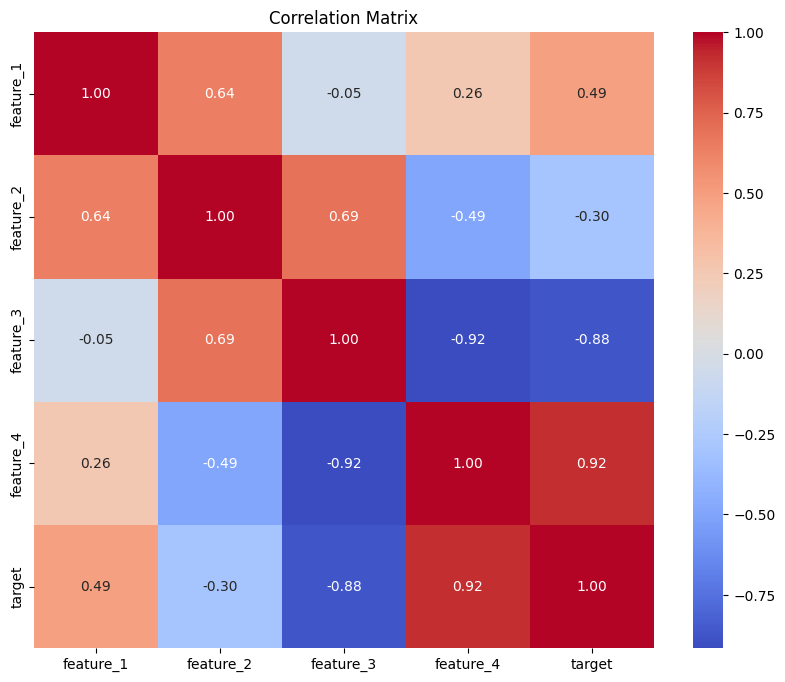

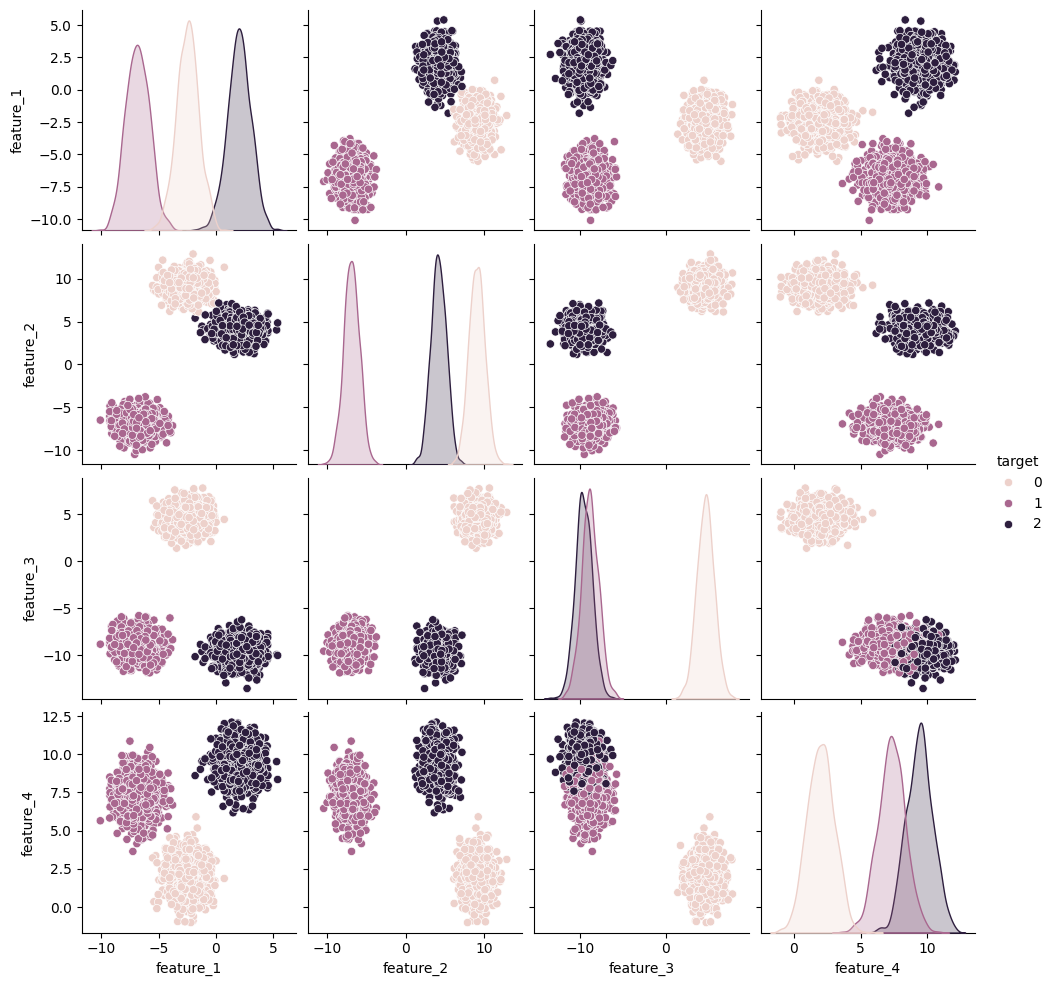

In [3]:
# Корреляционная матрица
correlation_matrix = df1.corr()

# Визуализация корреляционной матрицы
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Визуализация всех пар переменных
sns.pairplot(df1, hue='target')
plt.show()

In [24]:
def create_repeated_datasets(df, repeat_counts):
    datasets = {}
    for count in repeat_counts:
        df_repeated = df.copy()
        df_repeated = pd.concat([df_repeated[df_repeated['target'] == 0]] + 
                                [df_repeated[df_repeated['target'] == 1]] * count + 
                                [df_repeated[df_repeated['target'] == 2]], ignore_index=True)
        datasets[f'df{count}'] = df_repeated.sample(frac=1).reset_index(drop=True)  # Перемешиваем
    return datasets

repeat_counts = [2, 5, 10, 20, 50, 100, 1000, 10000]
datasets = create_repeated_datasets(df1, repeat_counts)

# Проверка размеров новых датасетов
for key, value in datasets.items():
    print(f"{key}: {len(value)} samples")


df2: 4000 samples
df5: 7000 samples
df10: 12000 samples
df20: 22000 samples
df50: 52000 samples
df100: 102000 samples
df1000: 1002000 samples
df10000: 10002000 samples


Visualizing LDA for df2


c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


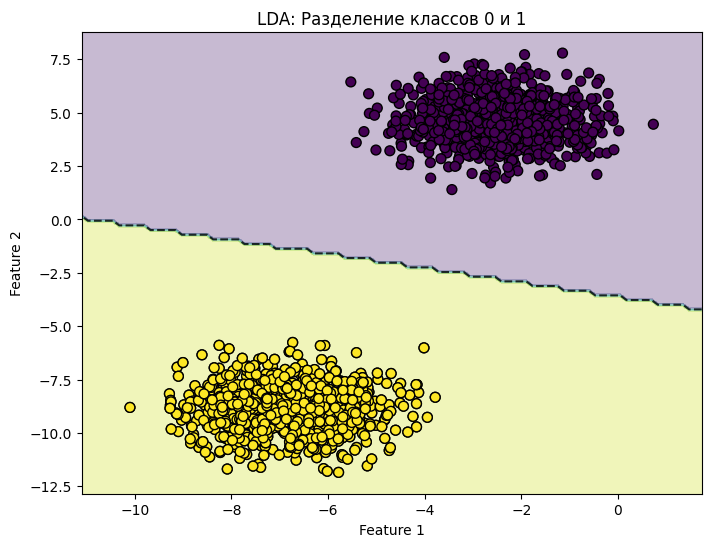

Visualizing LDA for df5


c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


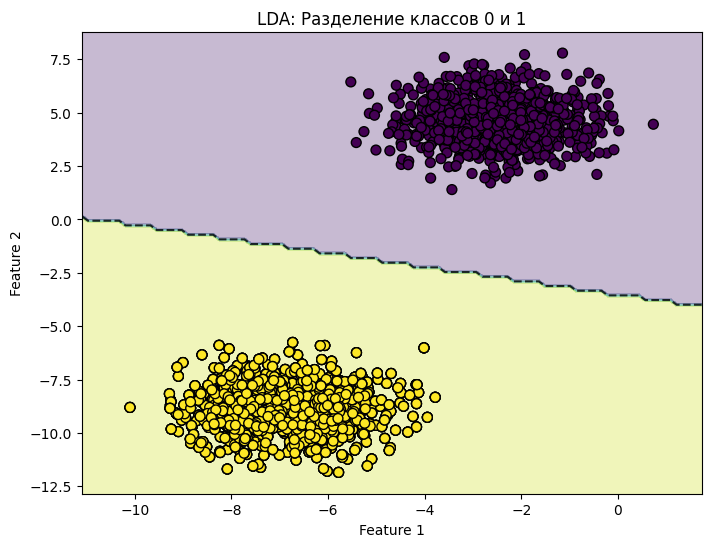

Visualizing LDA for df10


c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


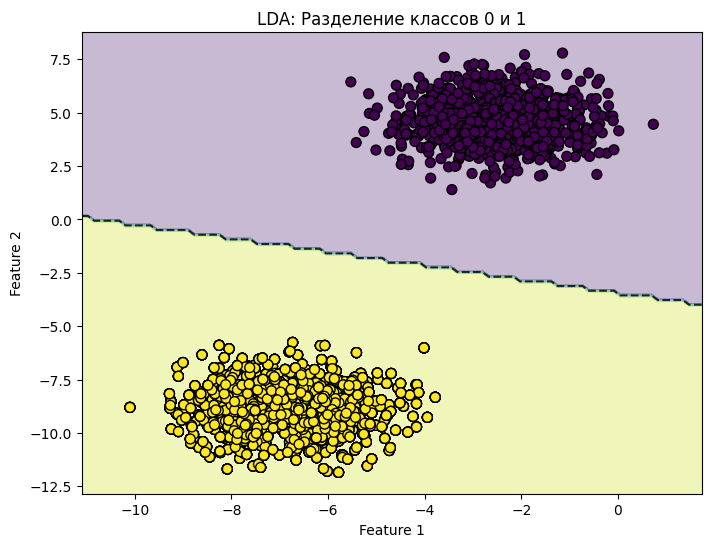

Visualizing LDA for df20


c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


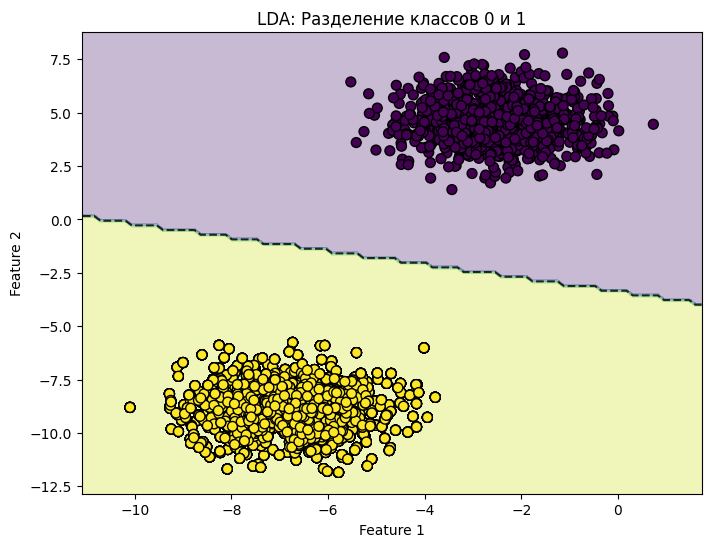

Visualizing LDA for df50


c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


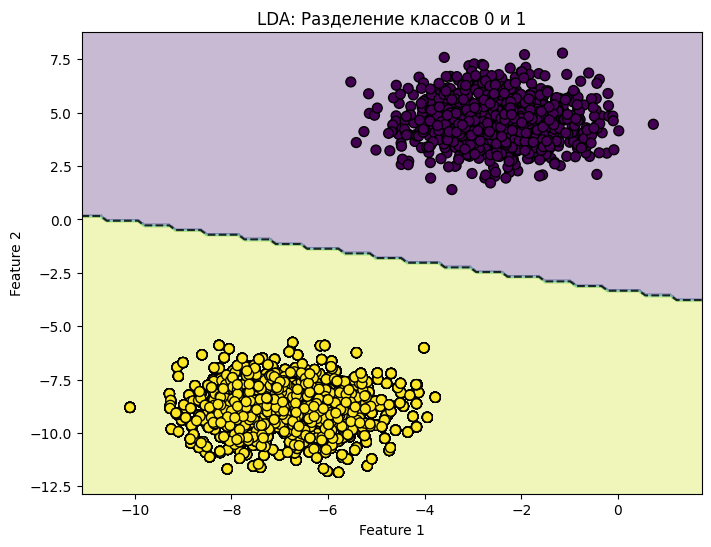

Visualizing LDA for df100


c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


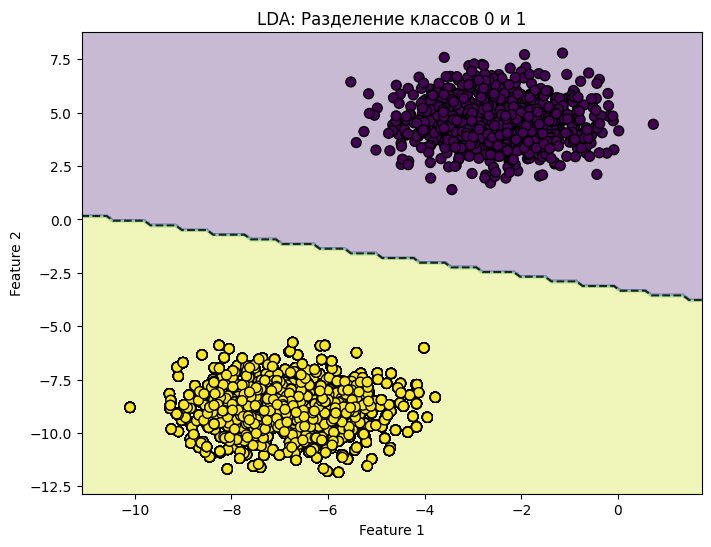

Visualizing LDA for df1000


c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


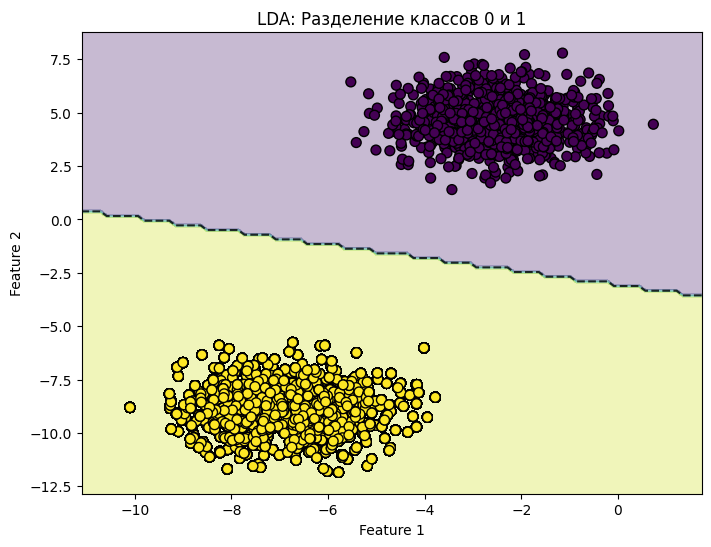

Visualizing LDA for df10000


c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


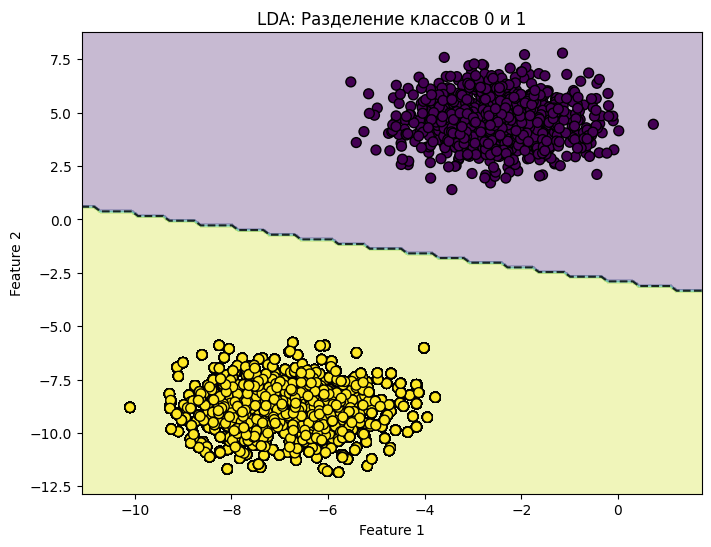

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
import matplotlib.pyplot as plt

# Визуализация LDA
def visualize_lda(dataset):
    df_filtered = dataset[dataset['target'].isin([1,2])]  # Только два класса
    X = df_filtered[['feature_3', 'feature_4']]
    y = df_filtered['target']

    lda = LinearDiscriminantAnalysis()
    lda.fit(X, y)
    
    # Создание сетки для визуализации
    x_min, x_max = X['feature_3'].min() - 1, X['feature_3'].max() + 1
    y_min, y_max = X['feature_4'].min() - 1, X['feature_4'].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    # Прогноз LDA для каждой точки сетки
    Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Визуализация
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    plt.scatter(X['feature_3'], X['feature_4'], c=y, cmap='viridis', edgecolor='k', s=50)
    plt.contour(xx, yy, Z, colors='k', levels=[0.5], alpha=0.8, linestyles=['--'])  # Решающая граница
    plt.title('LDA: Разделение классов 1 и 2')
    plt.xlabel('Feature 3')
    plt.ylabel('Feature 4')
    plt.show()

# Применяем LDA для каждого датасета
for key, dataset in datasets.items():
    print(f'Visualizing LDA for {key}')
    visualize_lda(dataset)


Visualizing SVM for df2


c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


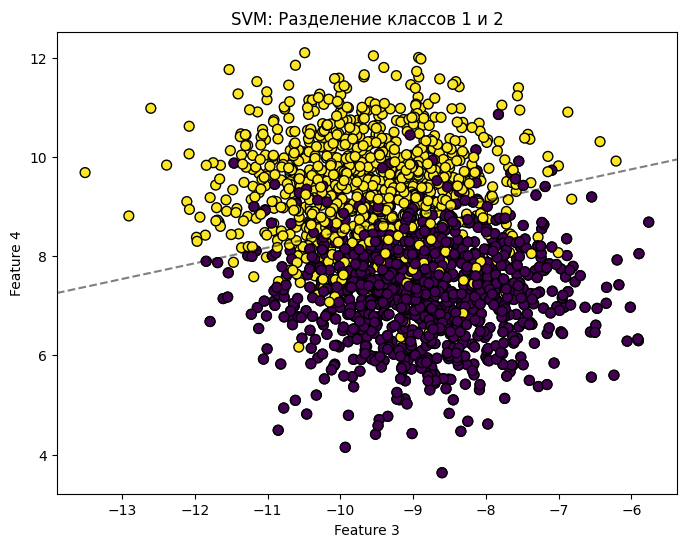

Visualizing SVM for df5


c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


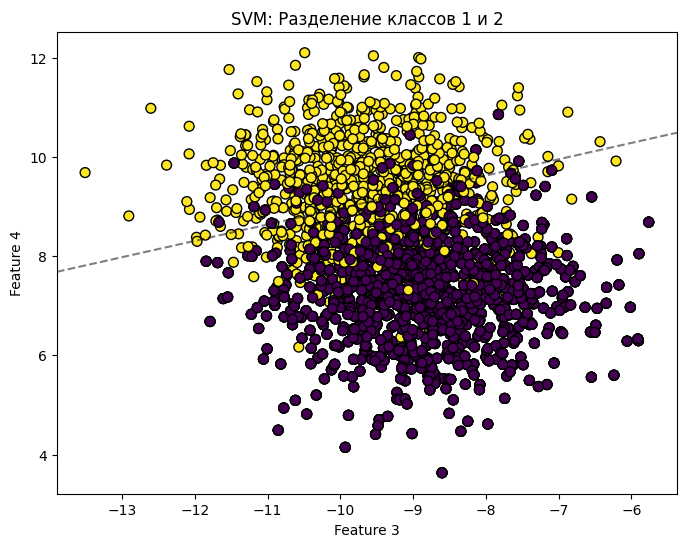

Visualizing SVM for df10


c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


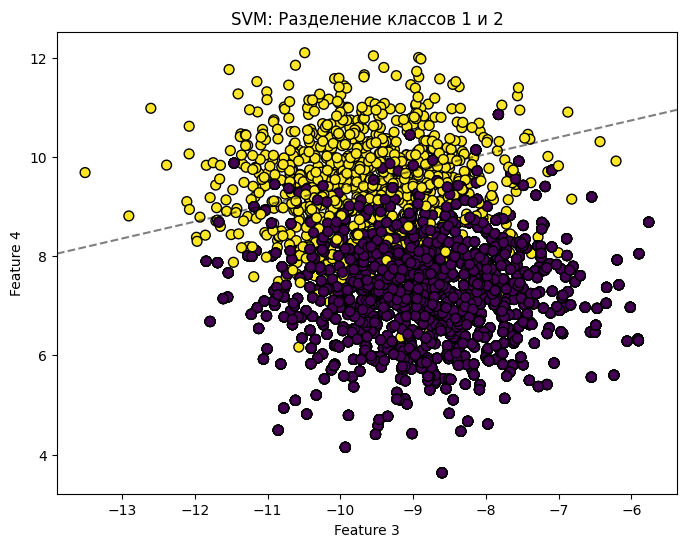

Visualizing SVM for df20


c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


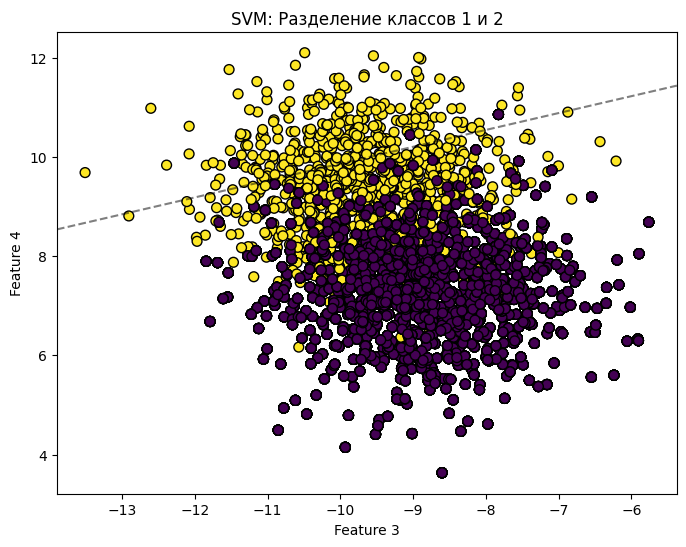

Visualizing SVM for df50


c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


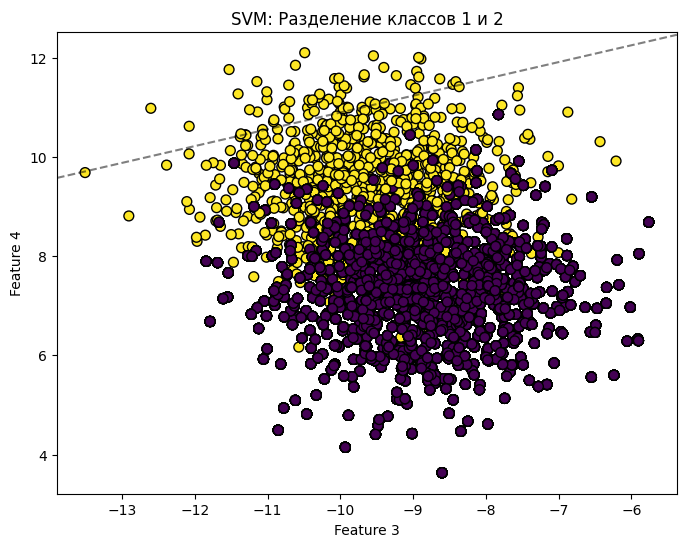

Visualizing SVM for df100


c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


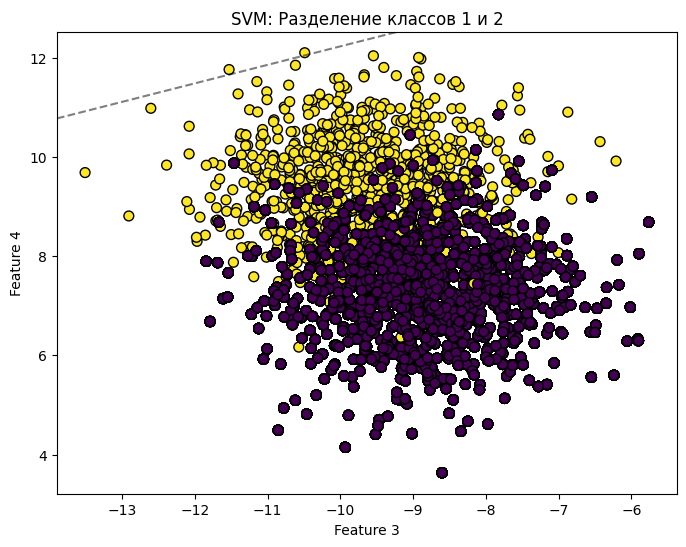

Visualizing SVM for df1000


c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


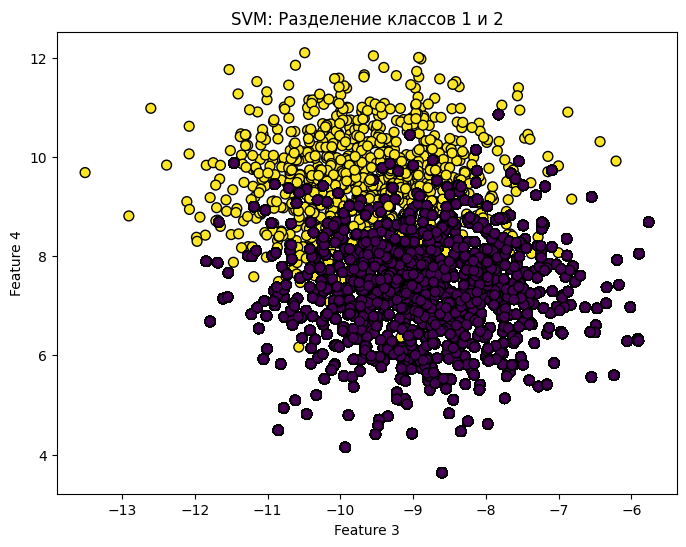

Visualizing SVM for df10000


c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


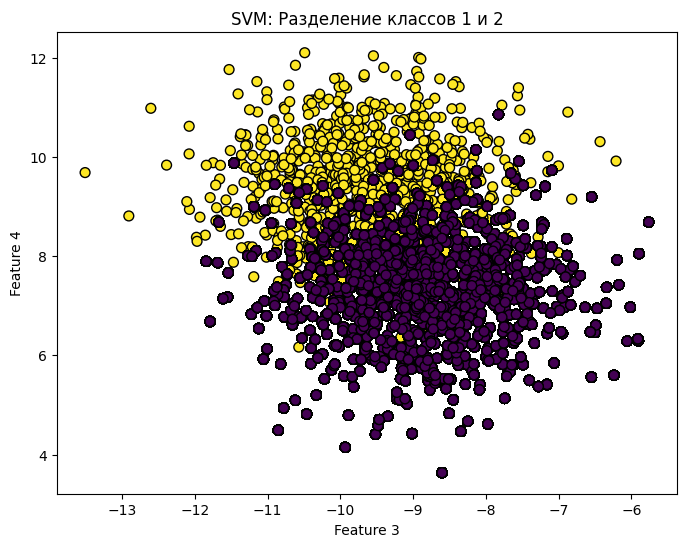

In [33]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
# Визуализация SVM
def visualize_svm(dataset):
    df_filtered = dataset[dataset['target'].isin([1,2])]  # Только два класса
    X = df_filtered[['feature_3', 'feature_4']]
    y = df_filtered['target']

    svc = LinearSVC()
    svc.fit(X, y)

    # Визуализация
    plt.figure(figsize=(8, 6))
    plt.scatter(X['feature_3'], X['feature_4'], c=y, cmap='viridis', edgecolor='k', s=50)

    # Определение границ
    xlim = plt.xlim()
    ylim = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
    Z = svc.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Визуализация решающей функции
    plt.contour(xx, yy, Z, colors='k', levels=[0], alpha=0.5, linestyles=['--'])
    plt.title('SVM: Разделение классов 1 и 2')
    plt.xlabel('Feature 3')
    plt.ylabel('Feature 4')
    plt.show()

# Применяем SVM для каждого датасета
for key, dataset in datasets.items():
    print(f'Visualizing SVM for {key}')
    visualize_svm(dataset)


c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


Center coordinates for df2


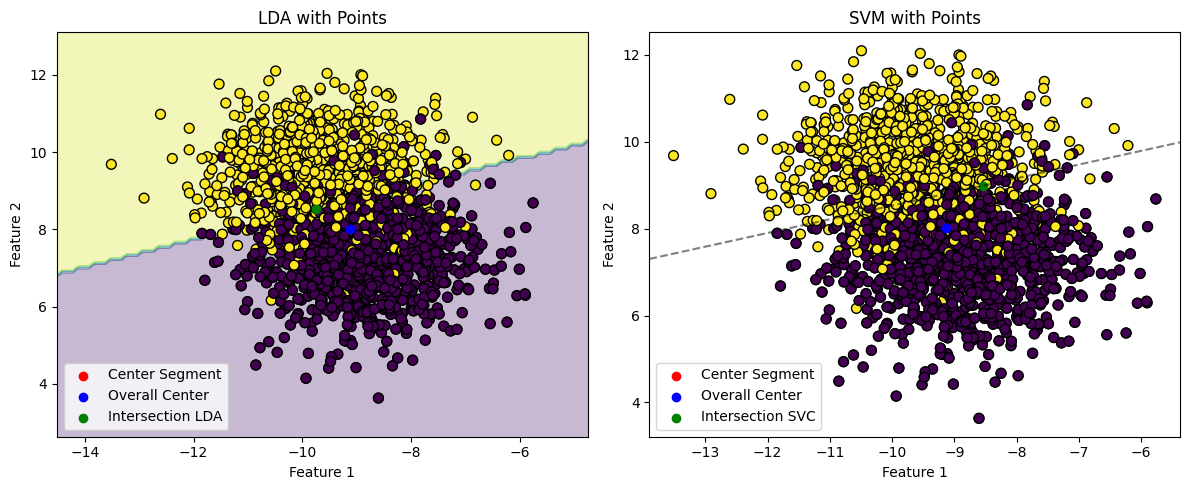

c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


Center coordinates for df5


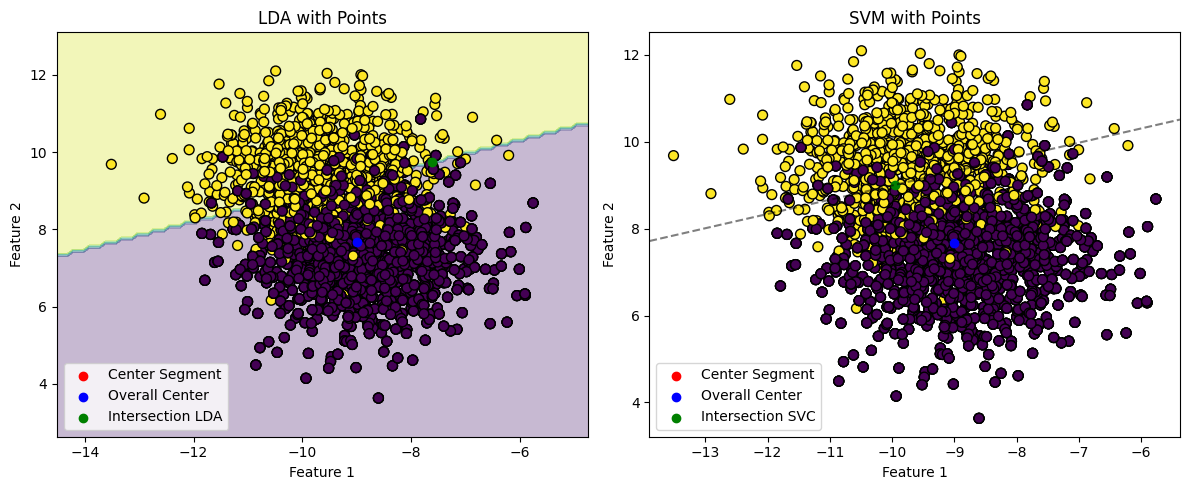

c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


Center coordinates for df10


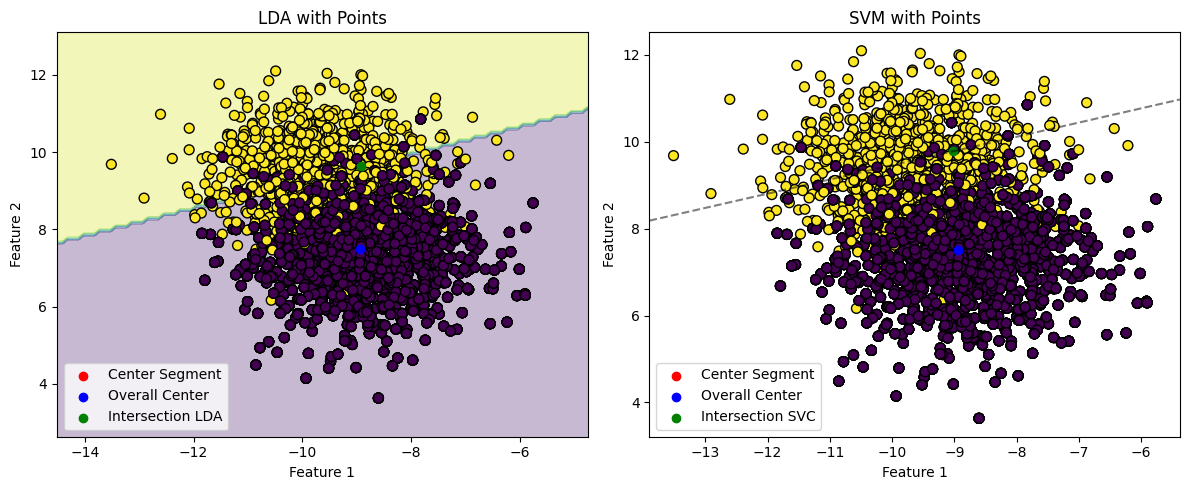

c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


Center coordinates for df20


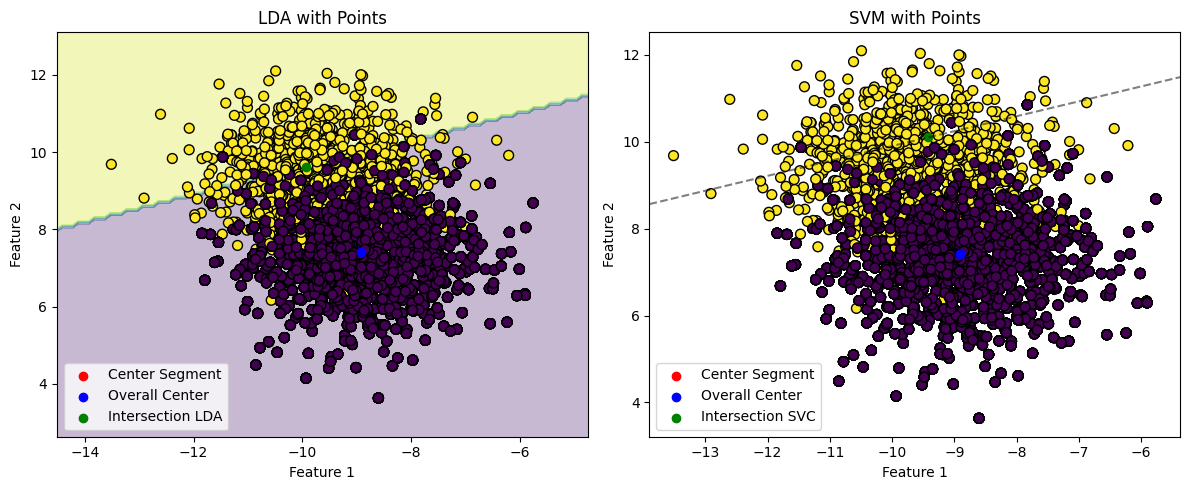

c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


Center coordinates for df50


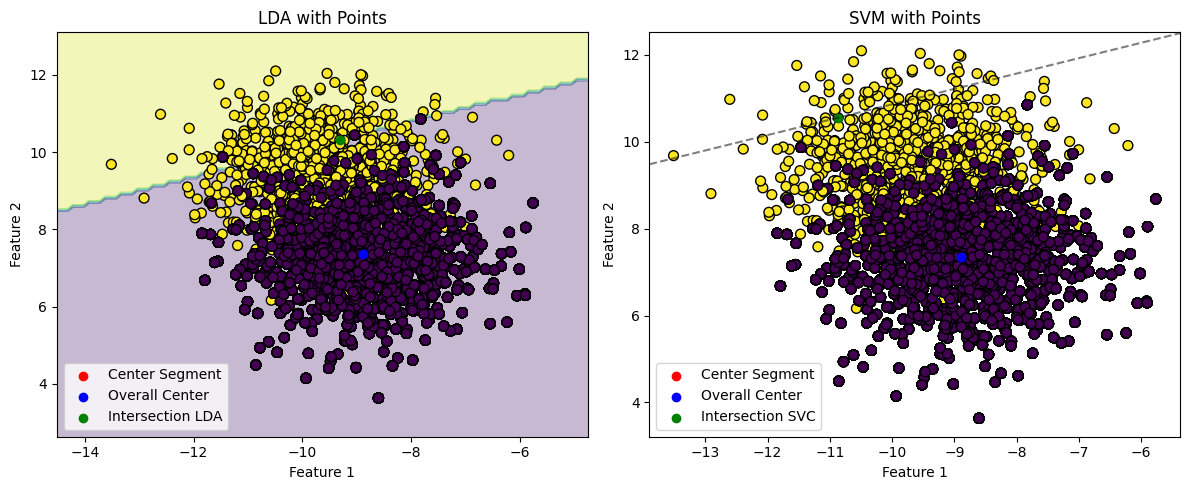

c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


Center coordinates for df100


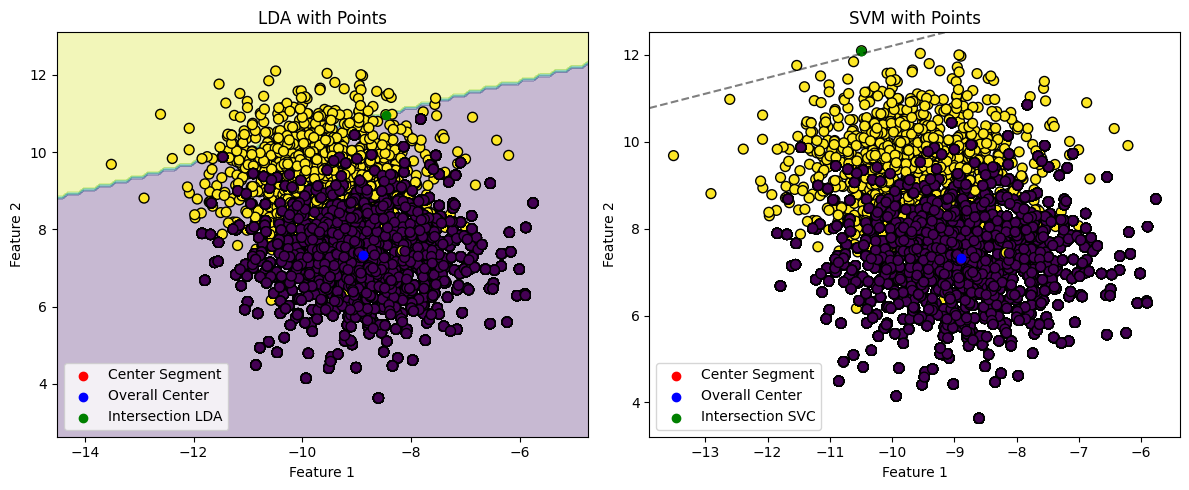

c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


Center coordinates for df1000


C:\Users\Александр\AppData\Local\Temp\ipykernel_16100\4017056719.py:81: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


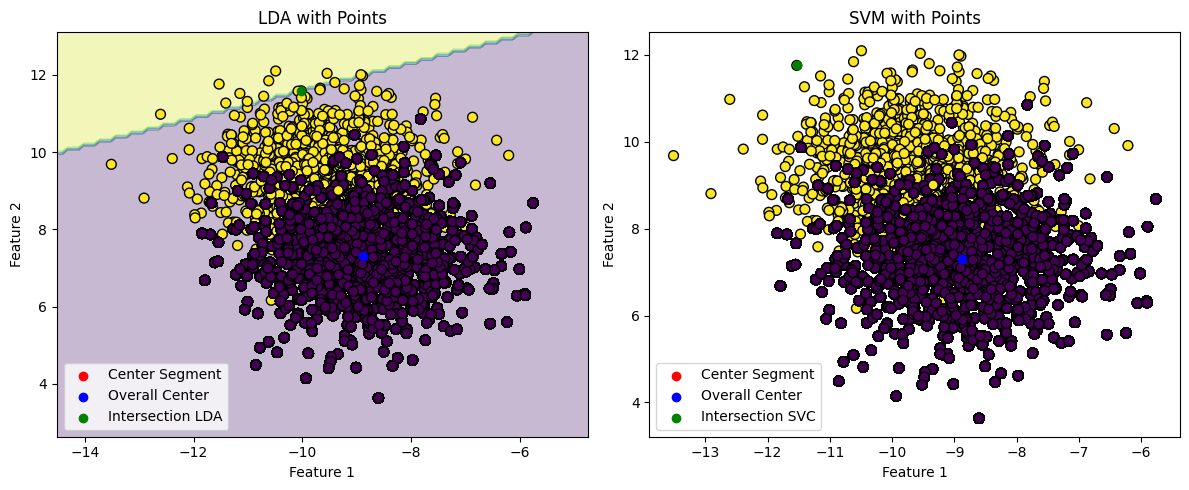

c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Center coordinates for df10000


c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(
C:\Users\Александр\AppData\Local\Temp\ipykernel_16100\4017056719.py:81: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


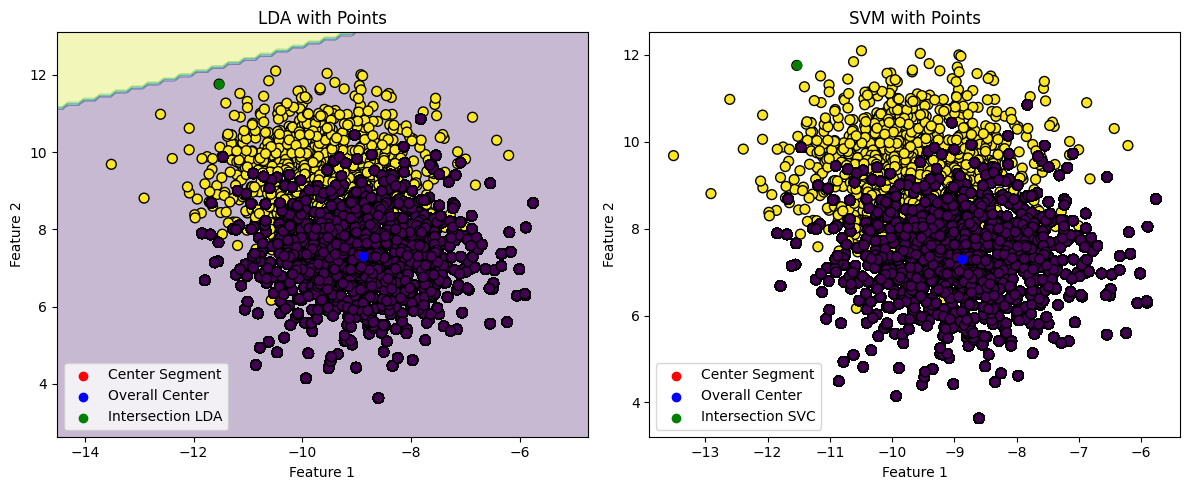

In [37]:
def find_coordinates(dataset, lda_model, svc_model):
    df_filtered = dataset[dataset['target'].isin([1, 2])]
    X = df_filtered[['feature_3', 'feature_4']]
    center_class_1 = df_filtered[df_filtered['target'] == 0][['feature_3', 'feature_4']].mean().values
    center_class_2 = df_filtered[df_filtered['target'] == 1][['feature_3', 'feature_4']].mean().values
    segment_center = (center_class_1 + center_class_2) / 2

    overall_center = df_filtered[['feature_3', 'feature_4']].mean().values

    # Пересечение LDA
    x_values = np.linspace(min(center_class_1[0], center_class_2[0]), max(center_class_1[0], center_class_2[0]), 100)
    lda_decision = lda_model.decision_function(X)
    intersection_point_lda = X.iloc[np.argmin(np.abs(lda_decision))].values

    # Пересечение SVM
    svc_decision = svc_model.decision_function(X)
    intersection_point_svc = X.iloc[np.argmin(np.abs(svc_decision))].values

    return {
        'segment_center': segment_center,
        'overall_center': overall_center,
        'intersection_point_lda': intersection_point_lda,
        'intersection_point_svc': intersection_point_svc
    }

# Визуализация результатов с отмеченными точками
def visualize_with_coordinates(dataset, lda_model, svc_model, coordinates):
    df_filtered = dataset[dataset['target'].isin([1,2])]
    X = df_filtered[['feature_3', 'feature_4']]
    y = df_filtered['target']
    # Визуализация LDA
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    lda = lda_model
    #lda.fit(X, y)

    x_min, x_max = X['feature_3'].min() - 1, X['feature_3'].max() + 1
    y_min, y_max = X['feature_4'].min() - 1, X['feature_4'].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    plt.scatter(X['feature_3'], X['feature_4'], c=y, cmap='viridis', edgecolor='k', s=50)

    # Отображаем центры и пересечения
    plt.scatter(coordinates['segment_center'][0], coordinates['segment_center'][1], color='red', label='Center Segment')
    plt.scatter(coordinates['overall_center'][0], coordinates['overall_center'][1], color='blue', label='Overall Center')
    plt.scatter(coordinates['intersection_point_lda'][0], coordinates['intersection_point_lda'][1], color='green', label='Intersection LDA')
    plt.title('LDA with Points')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    
    # Визуализация SVM
    plt.subplot(1, 2, 2)
    svc = svc_model
    #svc.fit(X, y)

    plt.scatter(X['feature_3'], X['feature_4'], c=y, cmap='viridis', edgecolor='k', s=50)

    xlim = plt.xlim()
    ylim = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
    Z = svc.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contour(xx, yy, Z, colors='k', levels=[0], alpha=0.5, linestyles=['--'])

    # Отображаем центры и пересечения
    plt.scatter(coordinates['segment_center'][0], coordinates['segment_center'][1], color='red', label='Center Segment')
    plt.scatter(coordinates['overall_center'][0], coordinates['overall_center'][1], color='blue', label='Overall Center')
    plt.scatter(coordinates['intersection_point_svc'][0], coordinates['intersection_point_svc'][1], color='green', label='Intersection SVC')

    plt.title('SVM with Points')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Сохраняем координаты и визуализируем для каждого датасета
coordinates = {}
for key, dataset in datasets.items():
    lda_model = LinearDiscriminantAnalysis()
    svc_model = LinearSVC()
    
    df_filtered = dataset[dataset['target'].isin([1,2])]
    X = df_filtered[['feature_3', 'feature_4']]
    y = df_filtered['target']
    
    lda_model.fit(X, y)
    svc_model.fit(X, y)
    print(f'Center coordinates for {key}')
    coordinates[key] = find_coordinates(dataset, lda_model, svc_model)
    visualize_with_coordinates(dataset, lda_model, svc_model, coordinates[key])


Plotting curves for df2 using LDA and target class 1


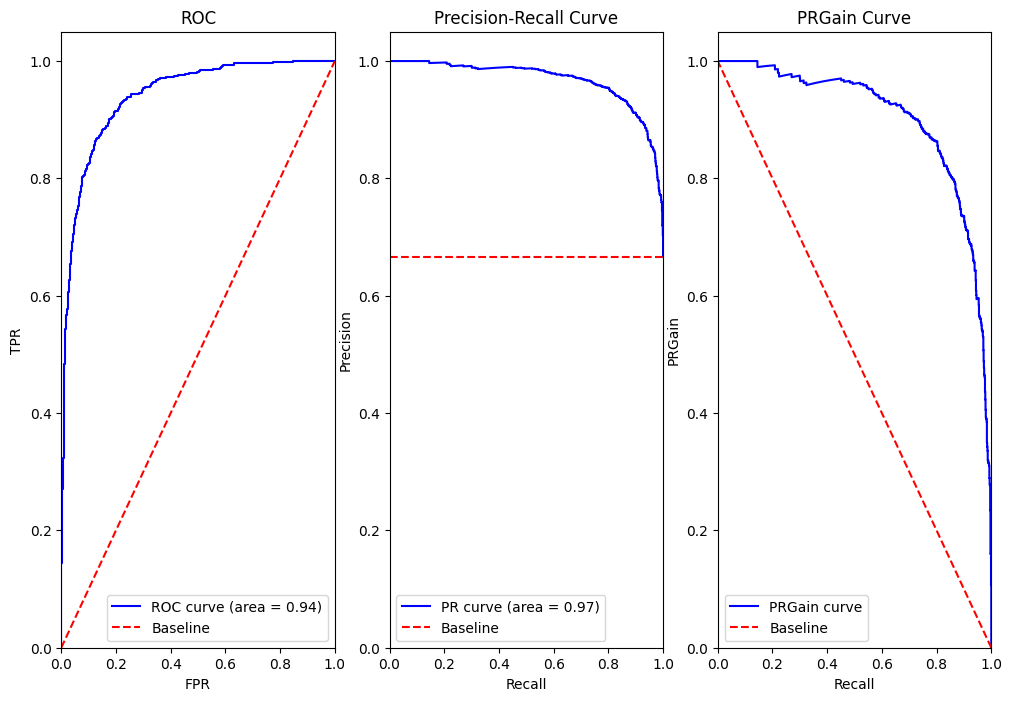

Plotting curves for df2 using SVM and target class 1


c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


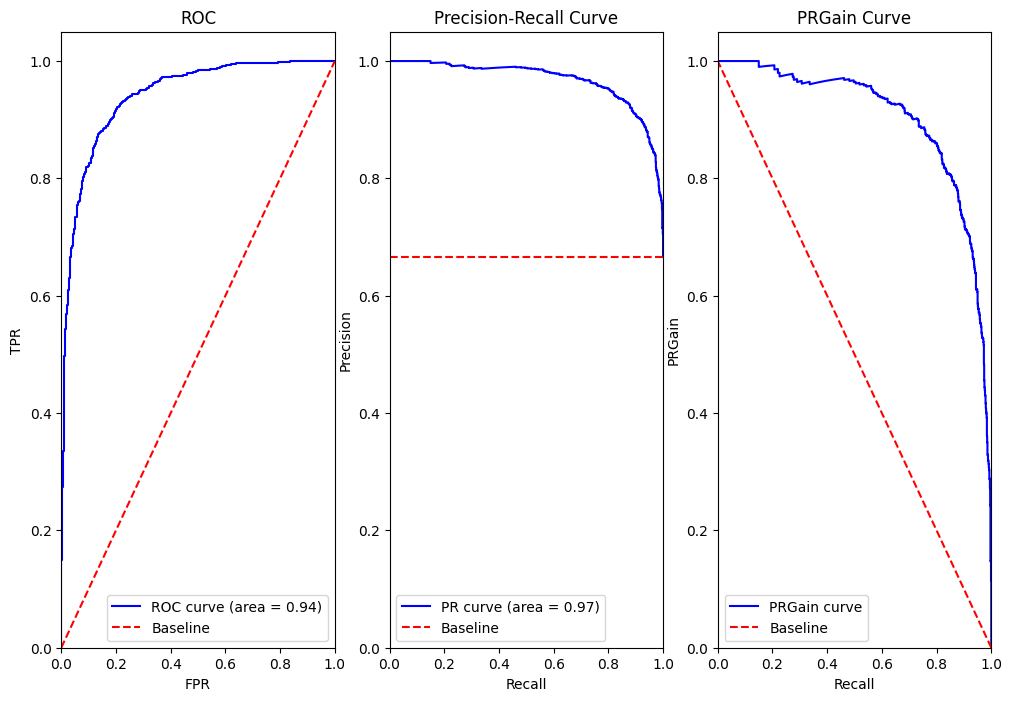

Plotting curves for df5 using LDA and target class 1


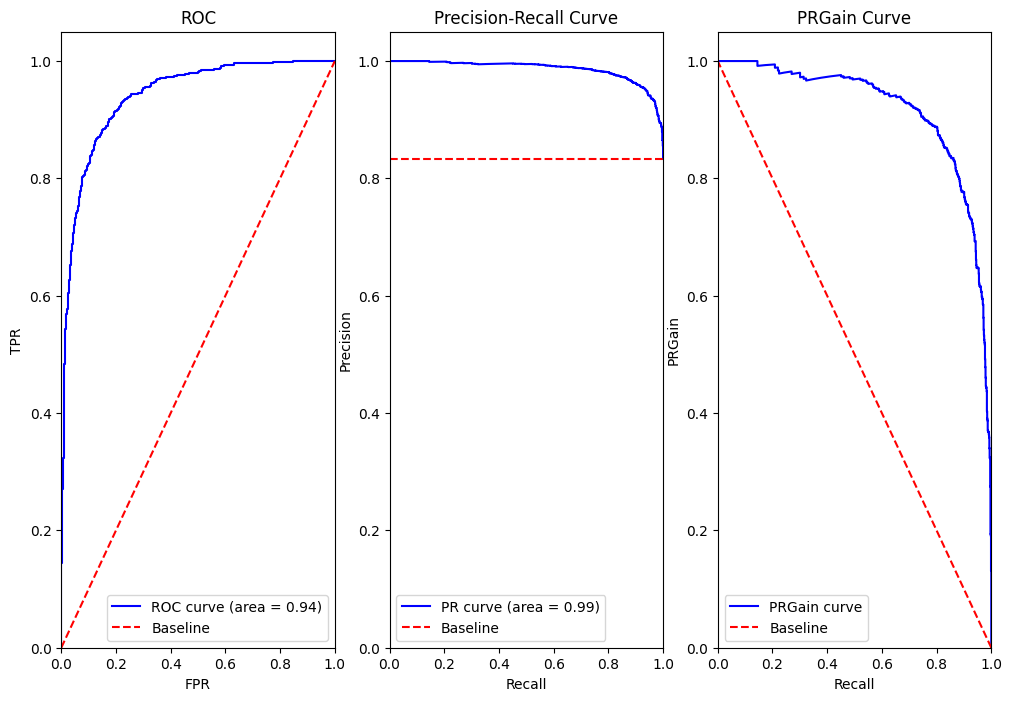

Plotting curves for df5 using SVM and target class 1


c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


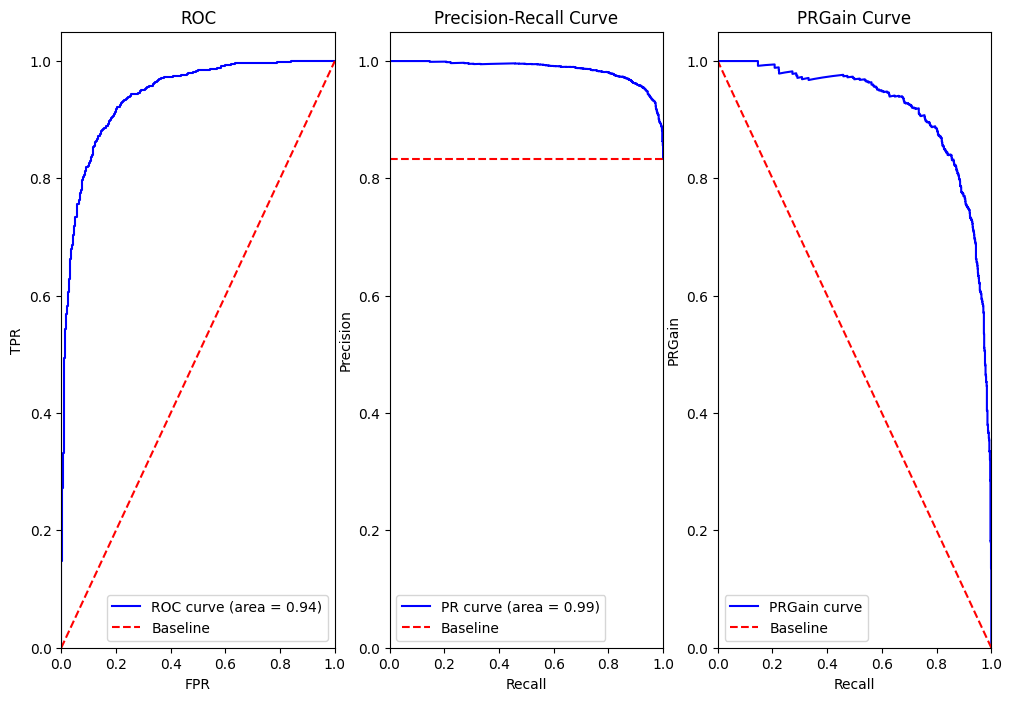

Plotting curves for df10 using LDA and target class 1


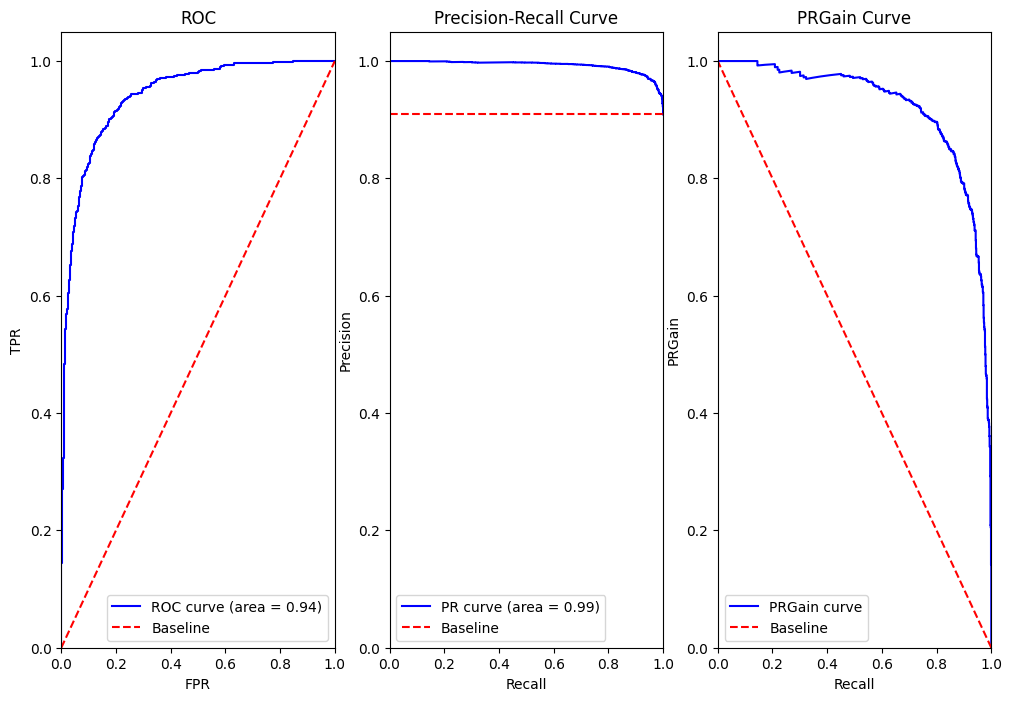

Plotting curves for df10 using SVM and target class 1


c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


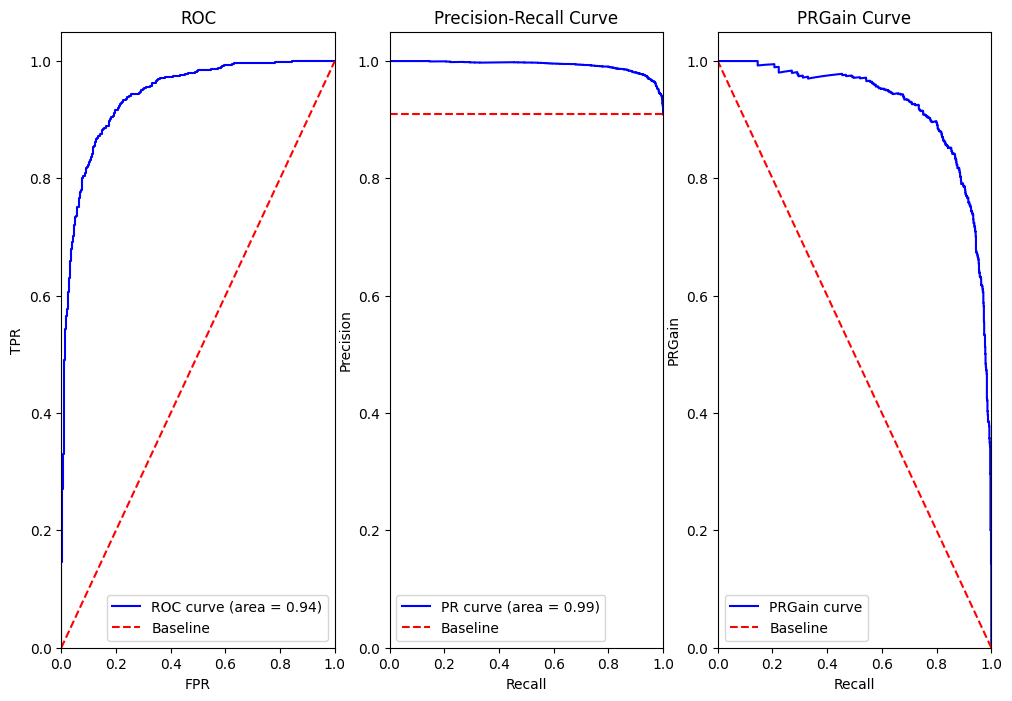

Plotting curves for df20 using LDA and target class 1


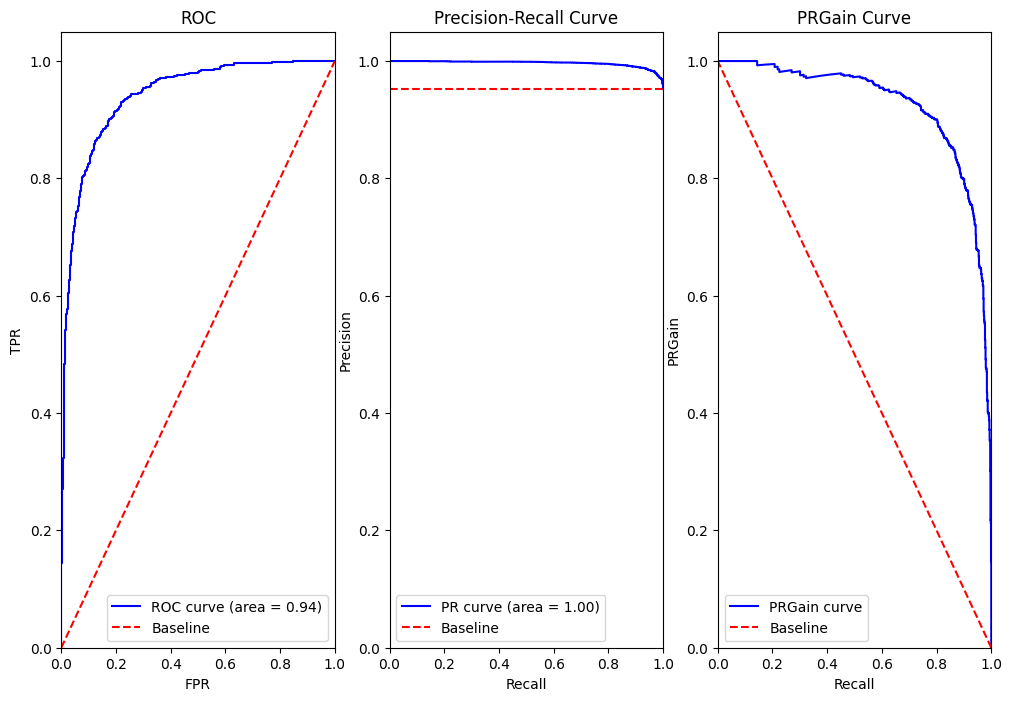

Plotting curves for df20 using SVM and target class 1


c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


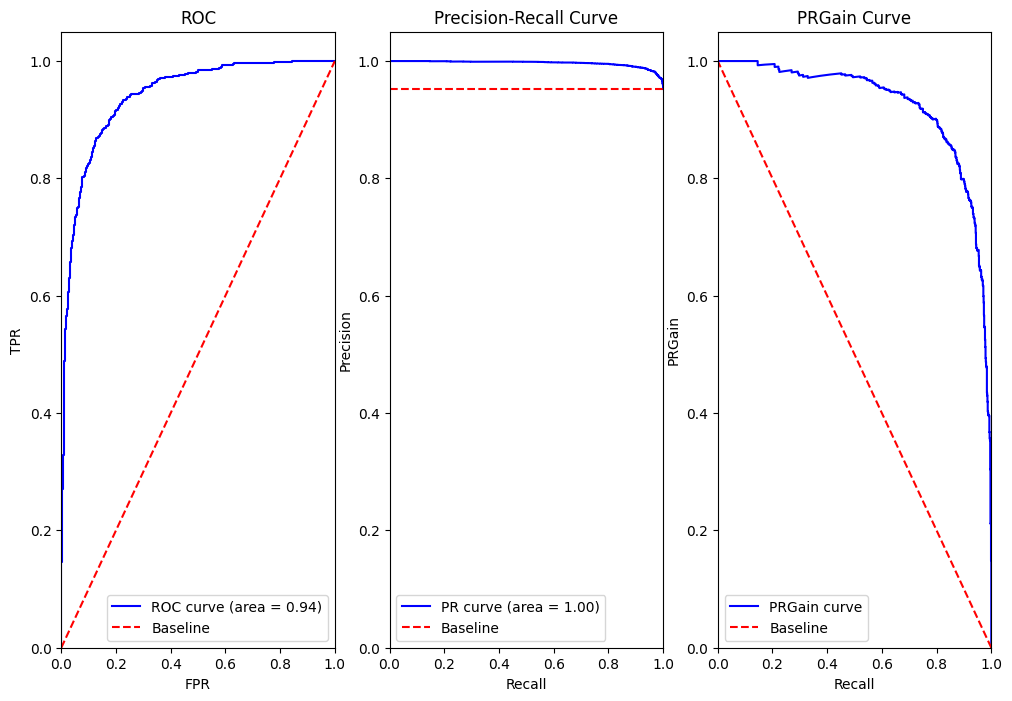

Plotting curves for df50 using LDA and target class 1


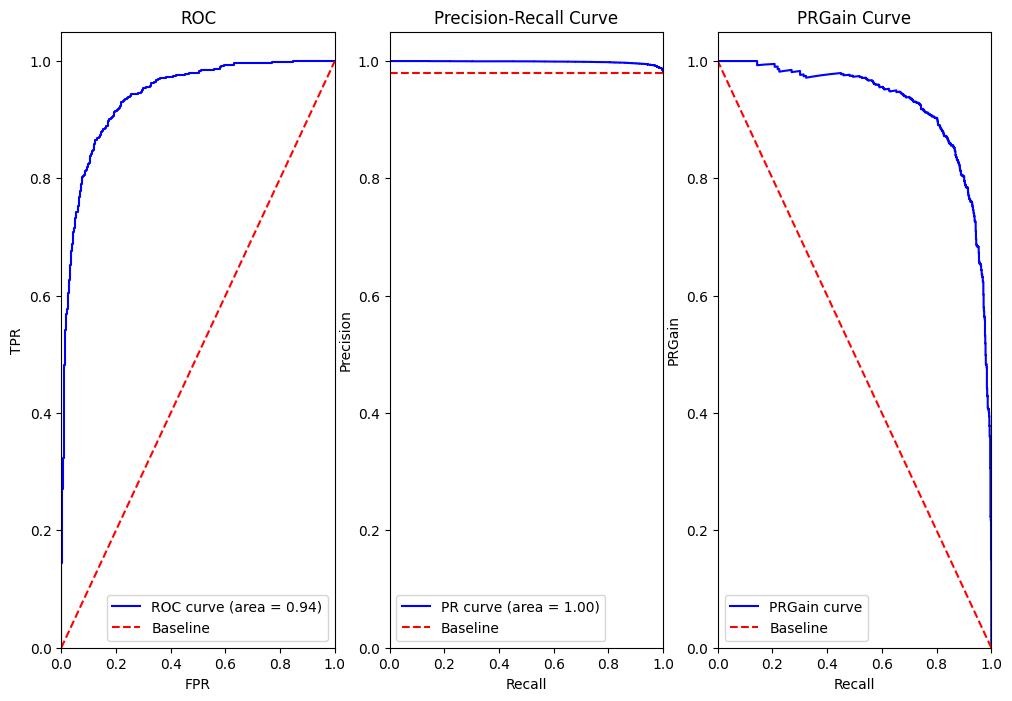

Plotting curves for df50 using SVM and target class 1


c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


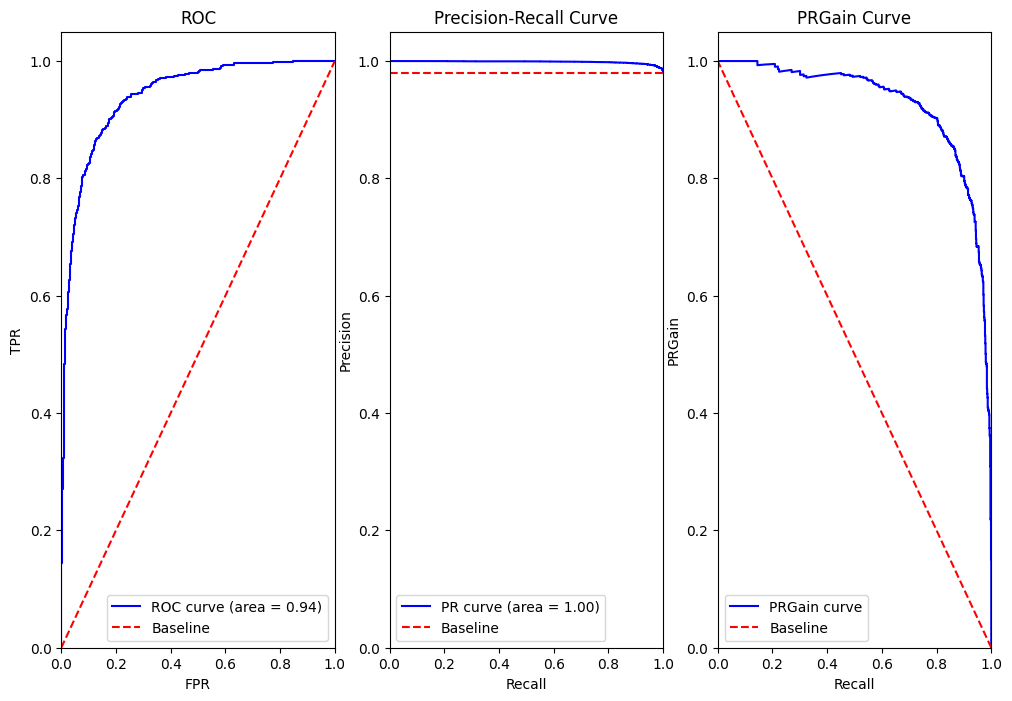

Plotting curves for df100 using LDA and target class 1


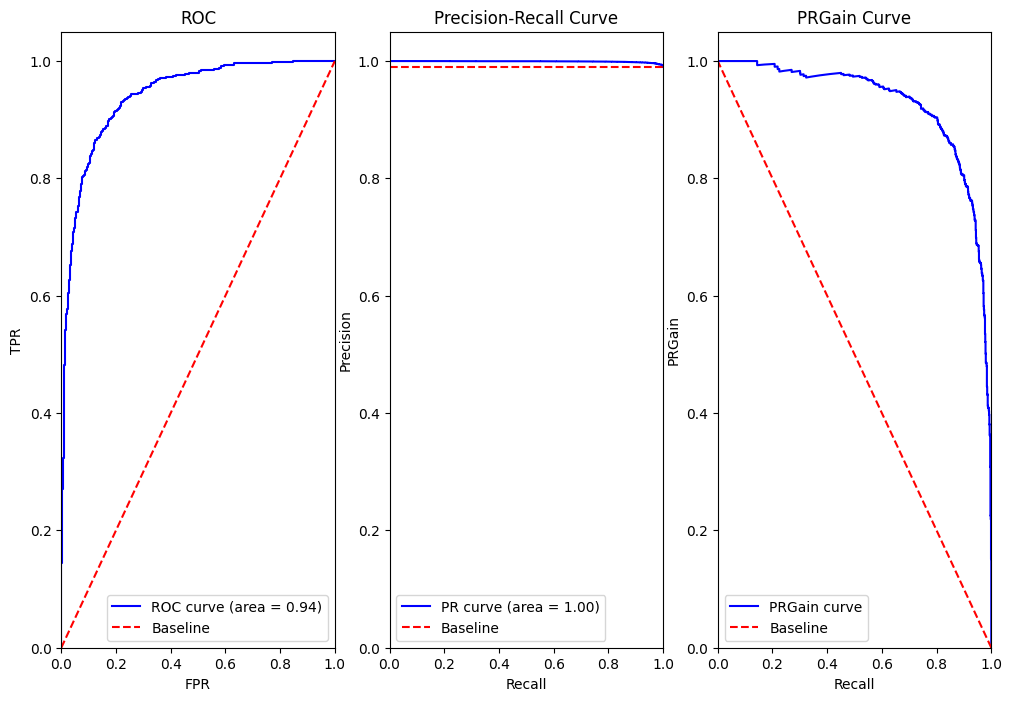

Plotting curves for df100 using SVM and target class 1


c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


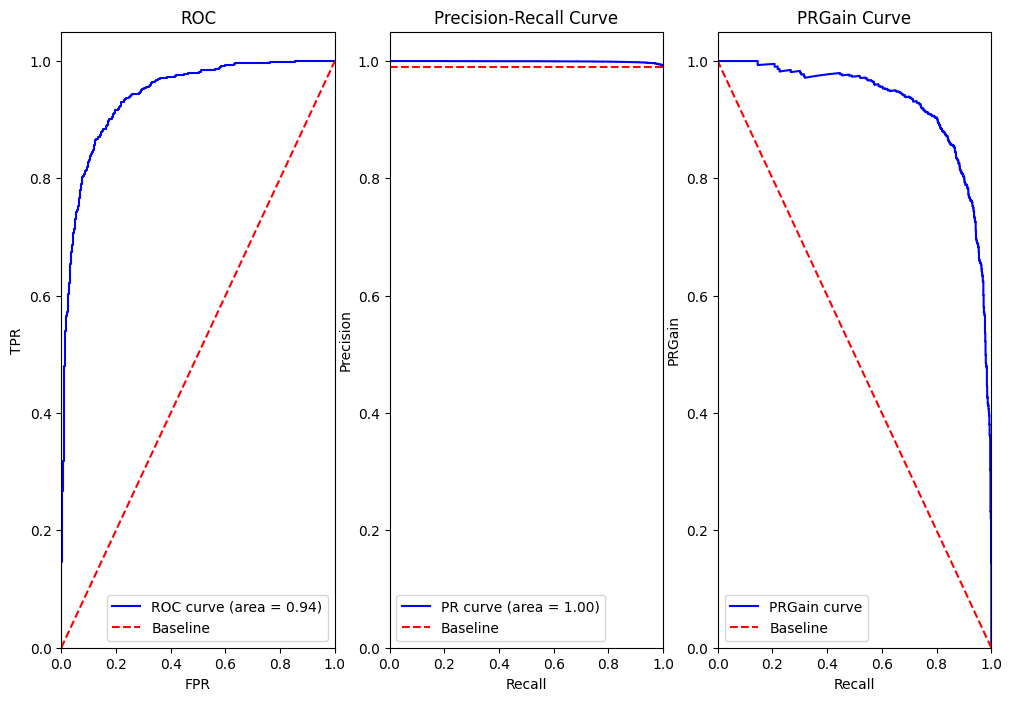

Plotting curves for df1000 using LDA and target class 1


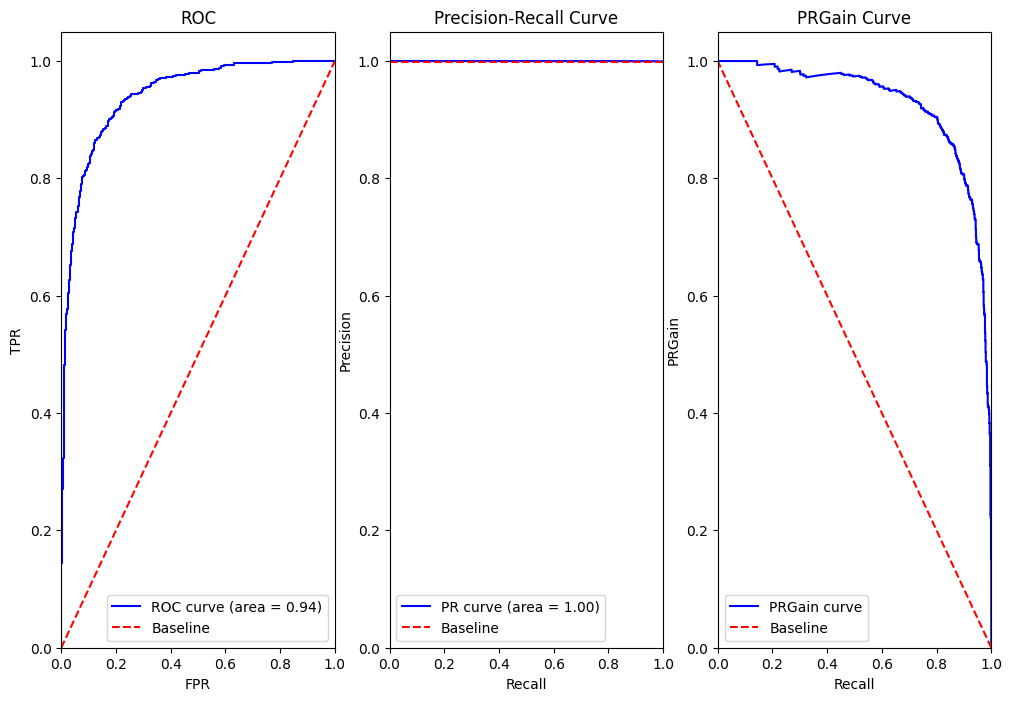

Plotting curves for df1000 using SVM and target class 1


c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


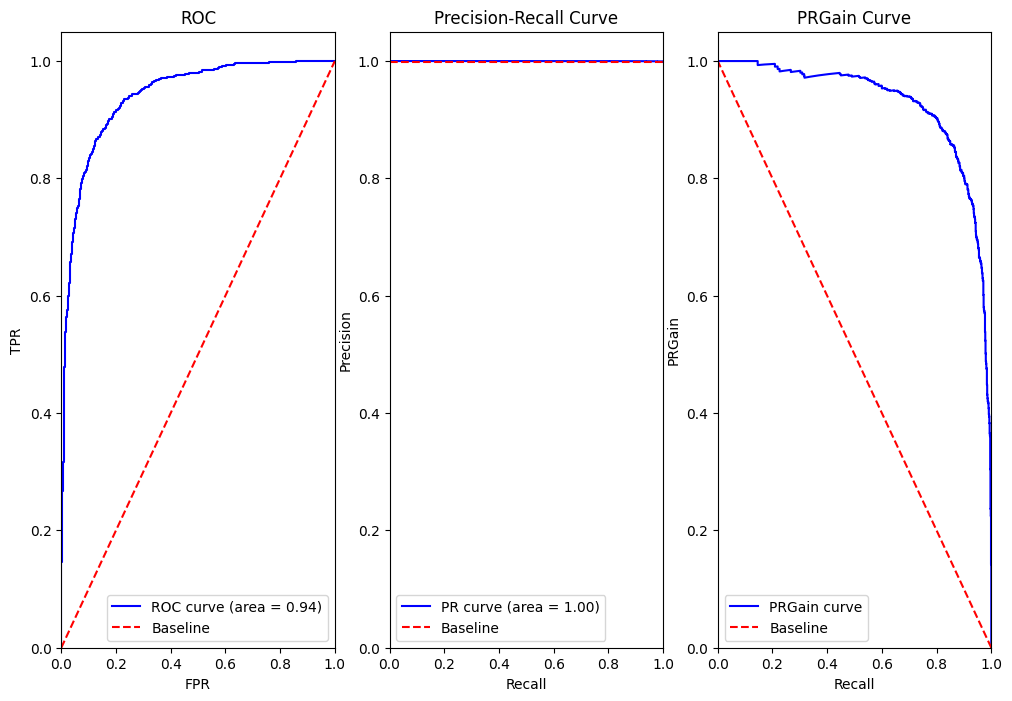

Plotting curves for df10000 using LDA and target class 1


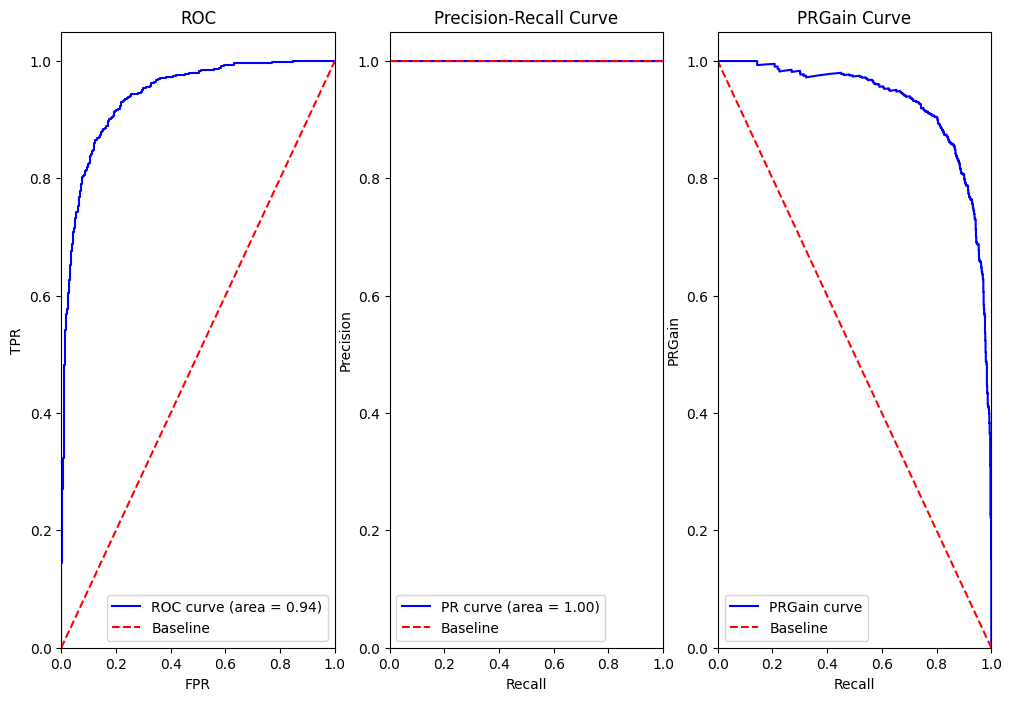

Plotting curves for df10000 using SVM and target class 1


c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


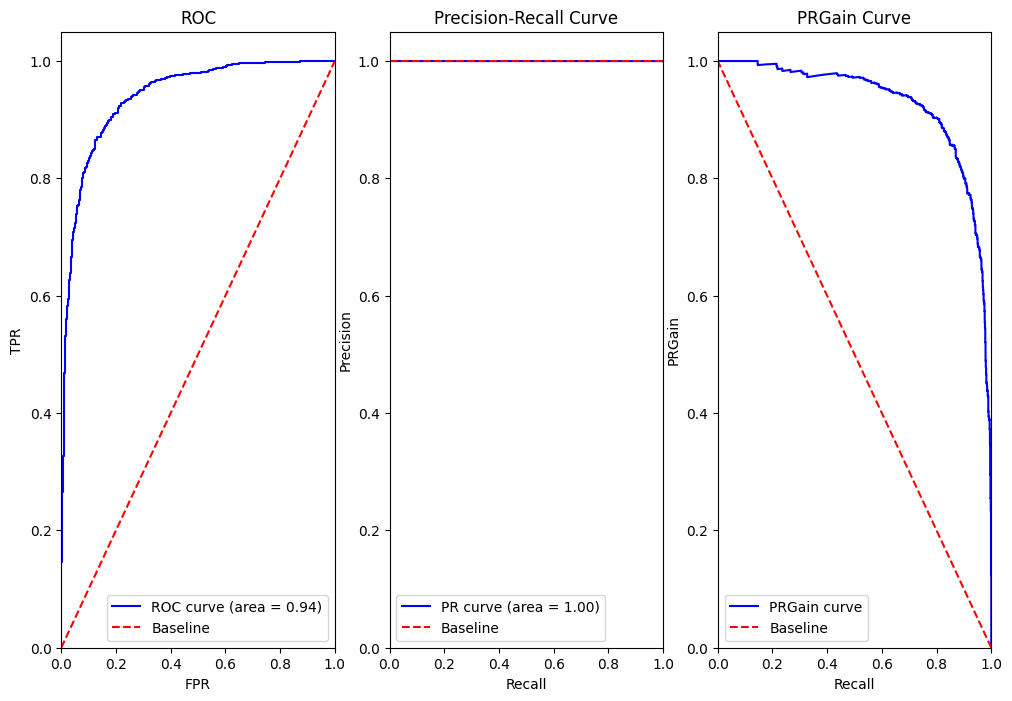

In [43]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
# Функция для построения ROC и PR кривых
def plot_curves(dataset, model, model_name, target_class):
    df_filtered = dataset[dataset['target'].isin([1,2])]
    X = df_filtered[['feature_3', 'feature_4']]
    y = (df_filtered['target'] == target_class).astype(int)

    # Прогноз
    model.fit(X, y)
    y_scores = model.decision_function(X)

    # ROC
    fpr, tpr, _ = roc_curve(y, y_scores)
    roc_auc = auc(fpr, tpr)

    # PR
    precision, recall, _ = precision_recall_curve(y, y_scores)
    pr_auc = auc(recall, precision)
    baseline = (df_filtered['target'] == target_class).sum() / len(df_filtered)

    pr_gain = (precision - baseline) / (1 - baseline)
    pr_gain[pr_gain < 0] = 0 

    # Визуализация ROC
    plt.figure(figsize=(12, 8))
    plt.subplot(1, 3, 1)
    plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Baseline')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC')
    plt.legend(loc='lower right')

    # Визуализация PR
    plt.subplot(1, 3, 2)
    plt.plot(recall, precision, color='b', label='PR curve (area = {:.2f})'.format(pr_auc))
    plt.axhline(y=baseline, color='r', linestyle='--', label='Baseline')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')
    

    plt.subplot(1, 3, 3)
    plt.plot(recall, pr_gain, color='b', label='PRGain curve')
    plt.plot([1, 0], [0, 1], color='red', linestyle='--', label='Baseline')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('PRGain')
    plt.title('PRGain Curve')
    plt.legend(loc='lower left')
    plt.show()

# Применение для LDA и SVM для целевого класса 1
for key, dataset in datasets.items():
    print(f'Plotting curves for {key} using LDA and target class 1')
    lda_model = LinearDiscriminantAnalysis()
    plot_curves(dataset, lda_model, 'LDA', target_class=1)

    print(f'Plotting curves for {key} using SVM and target class 1')
    svc_model = LinearSVC()
    plot_curves(dataset, svc_model, 'SVM', target_class=1)




Plotting curves ROC + PR curves for df2 using LDA and target class 1


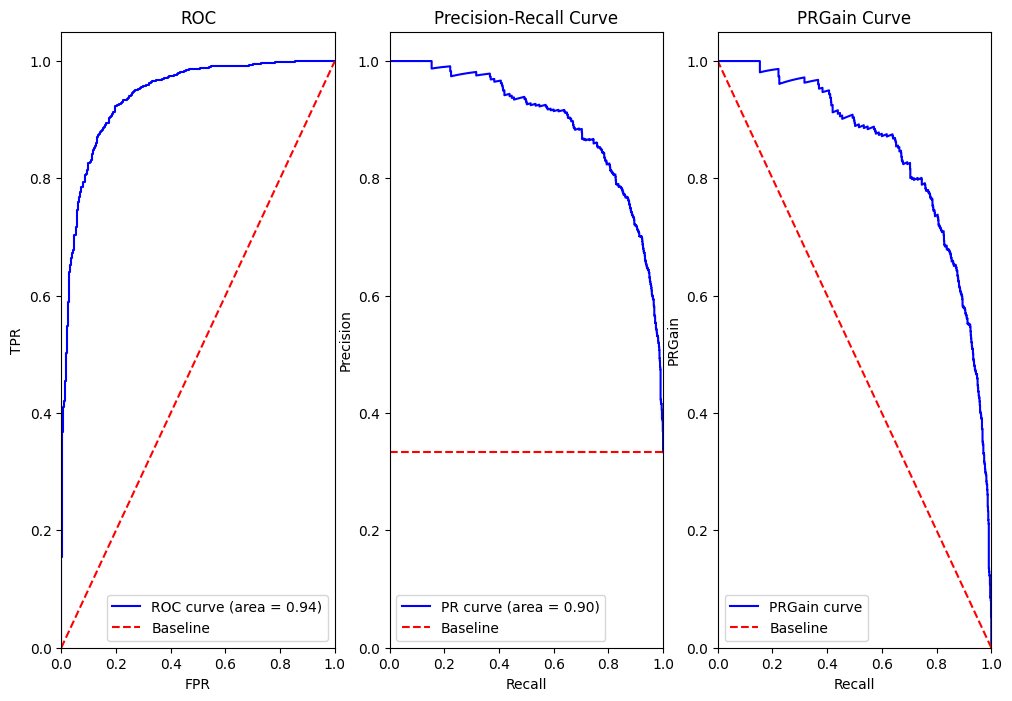

Plotting curves for df2 using SVM and target class 1


c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


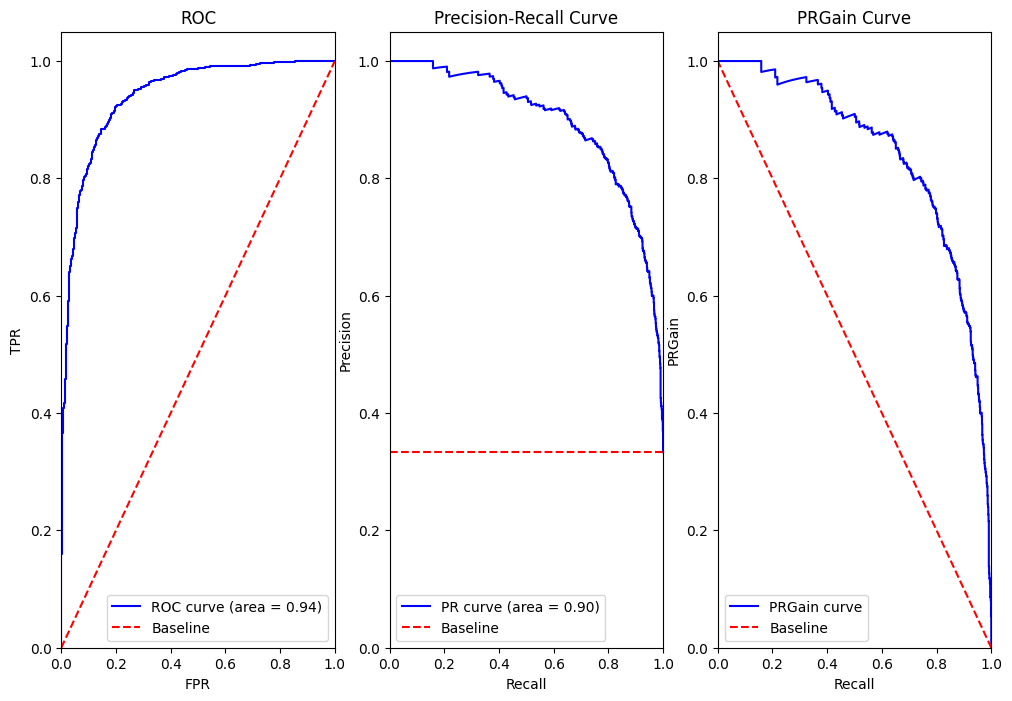

Plotting curves ROC + PR curves for df5 using LDA and target class 1


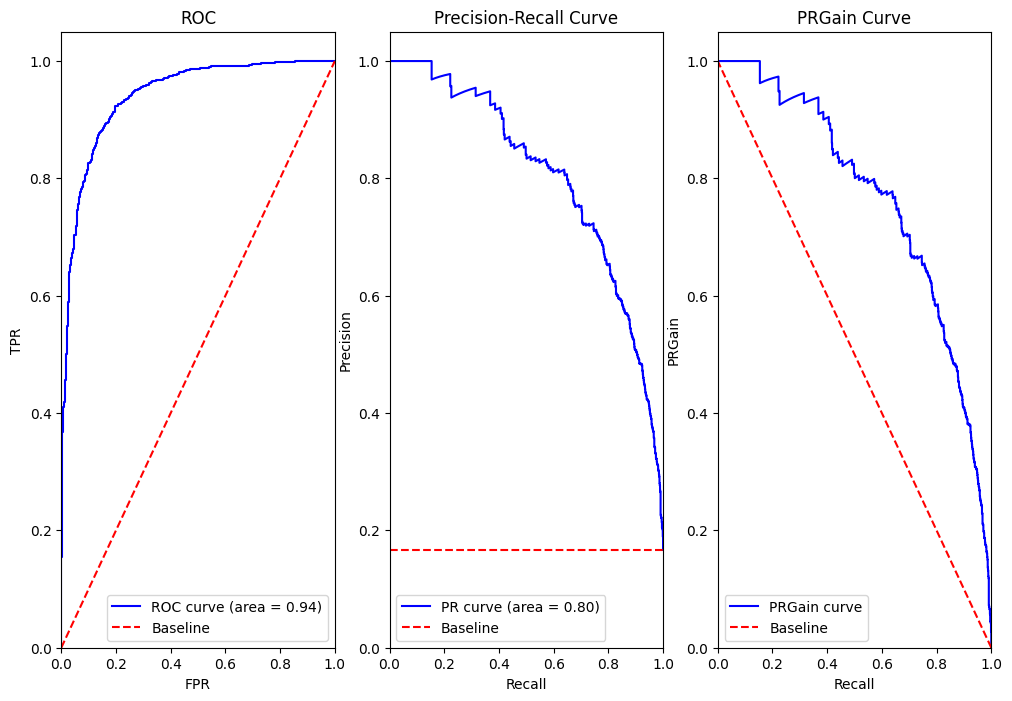

Plotting curves for df5 using SVM and target class 1


c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


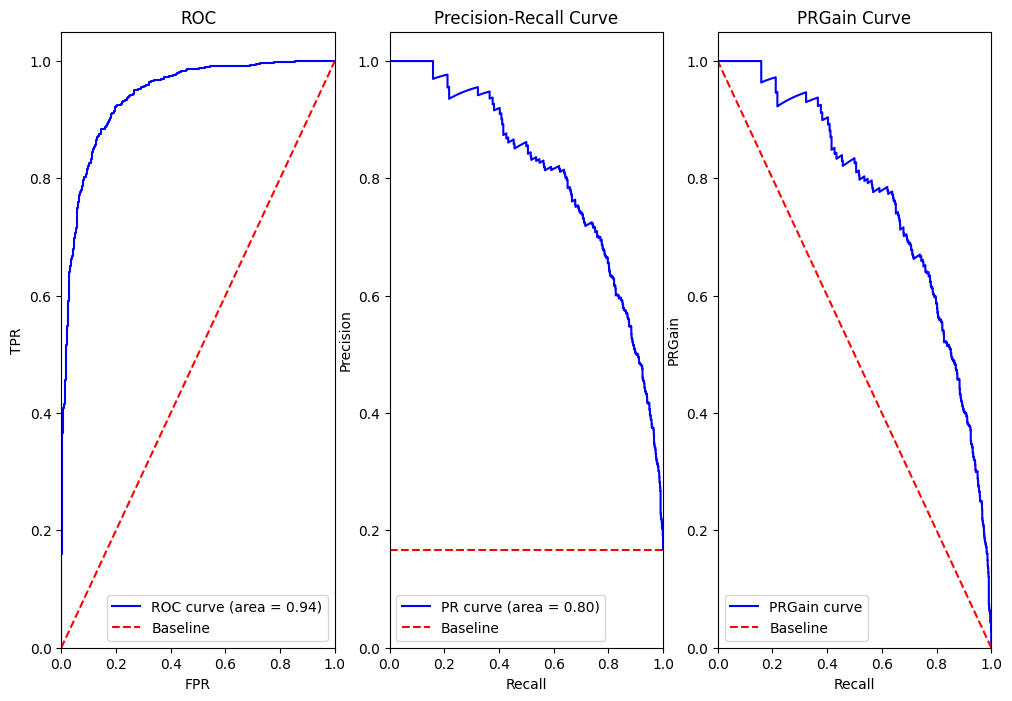

Plotting curves ROC + PR curves for df10 using LDA and target class 1


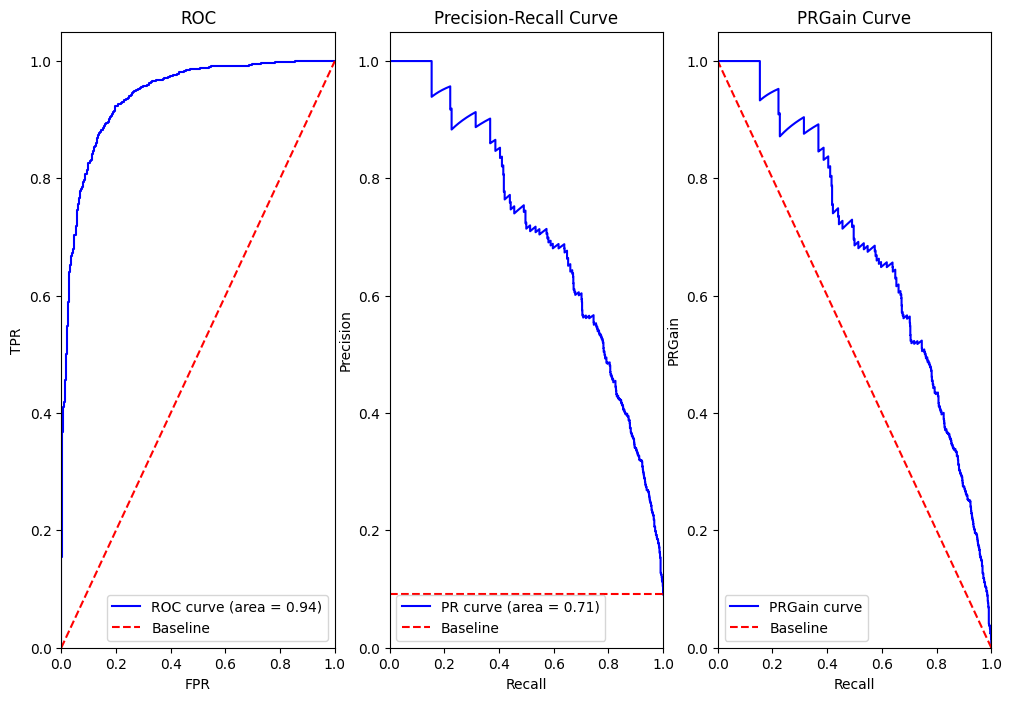

Plotting curves for df10 using SVM and target class 1


c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


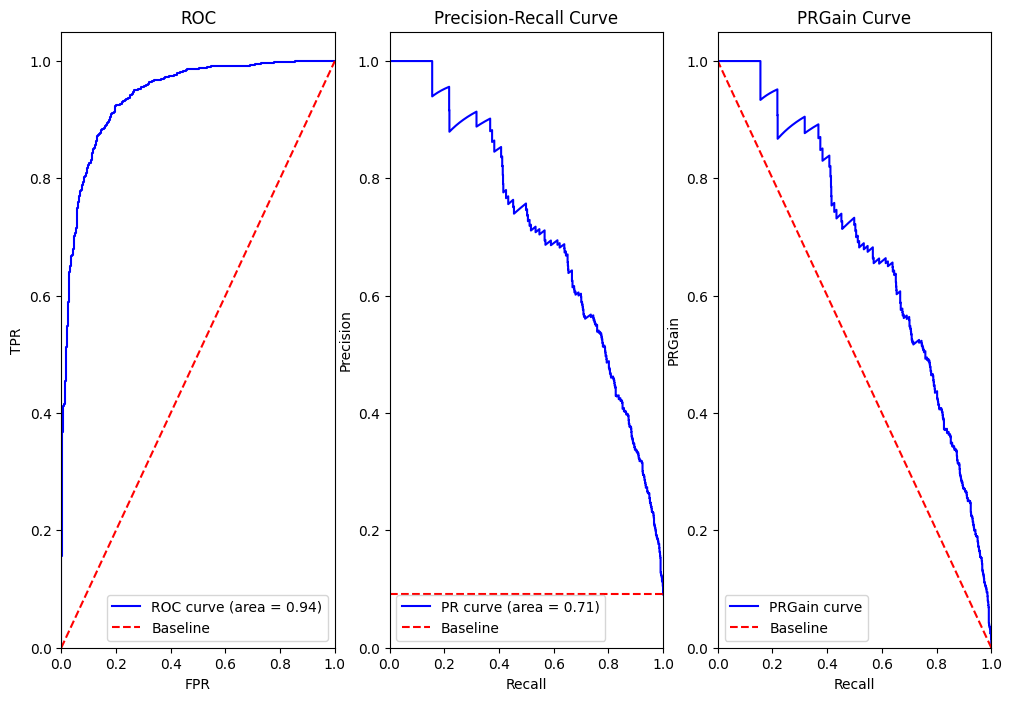

Plotting curves ROC + PR curves for df20 using LDA and target class 1


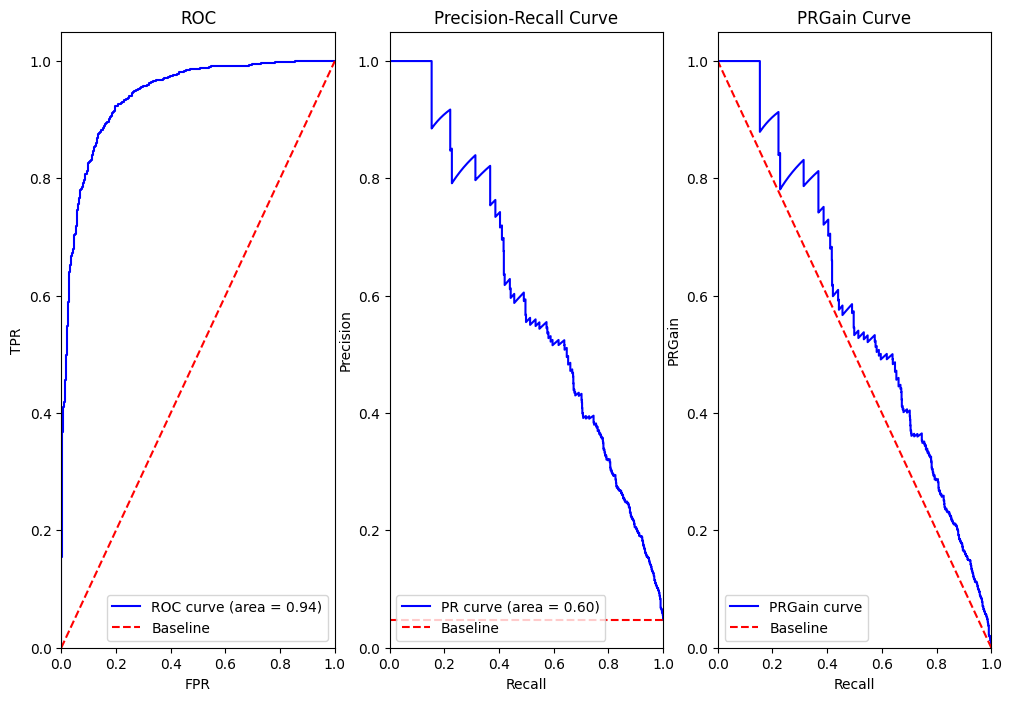

Plotting curves for df20 using SVM and target class 1


c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


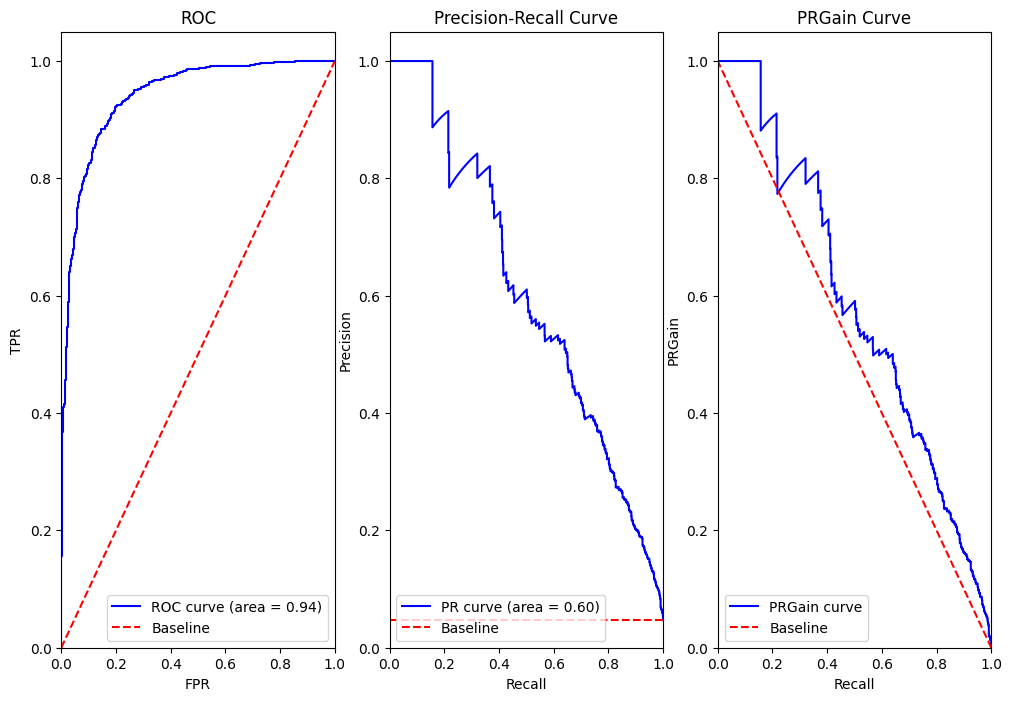

Plotting curves ROC + PR curves for df50 using LDA and target class 1


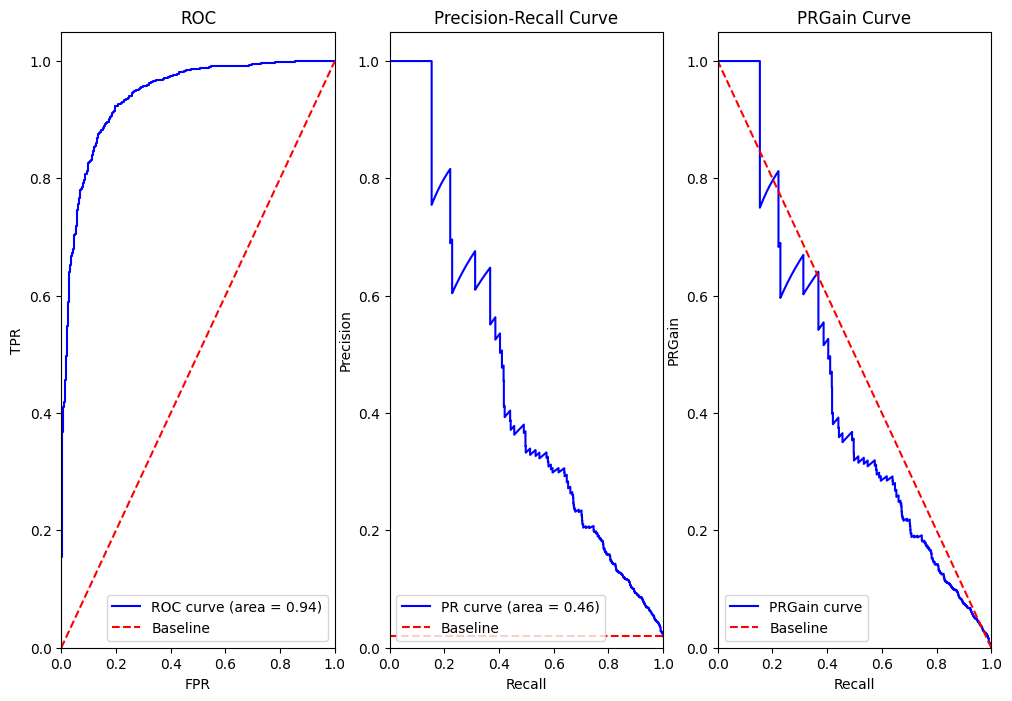

Plotting curves for df50 using SVM and target class 1


c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


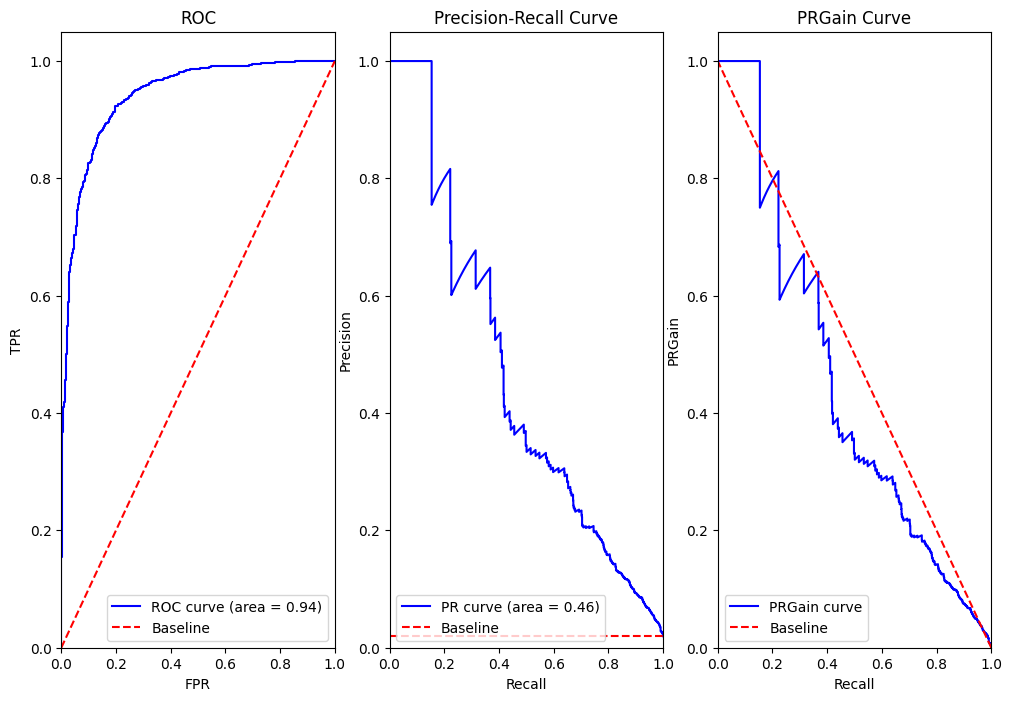

Plotting curves ROC + PR curves for df100 using LDA and target class 1


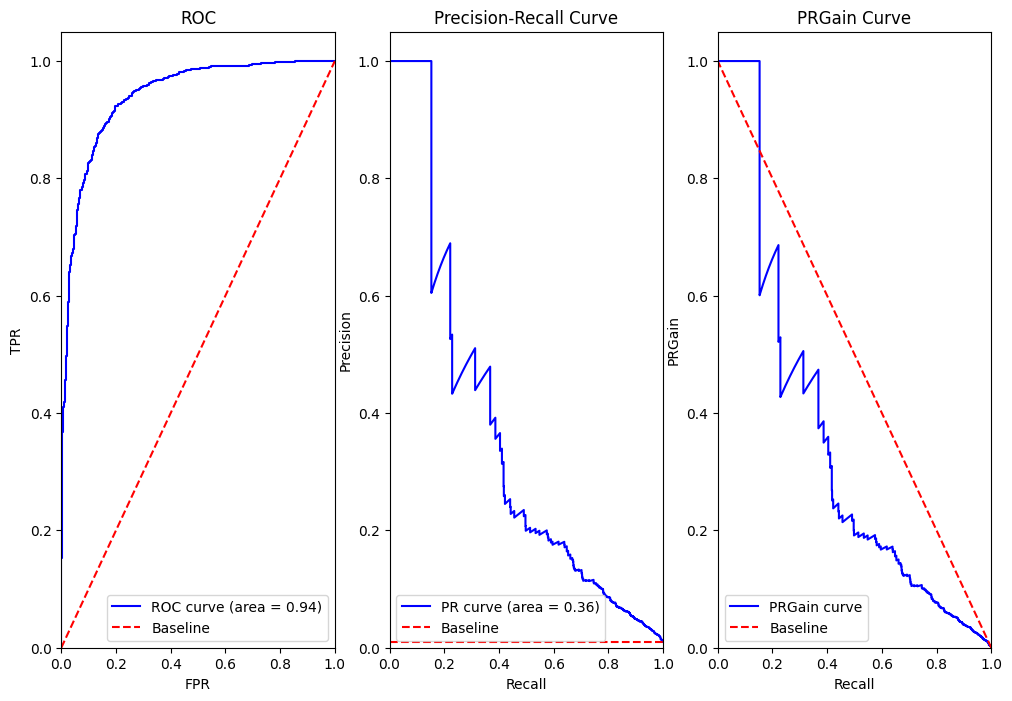

Plotting curves for df100 using SVM and target class 1


c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


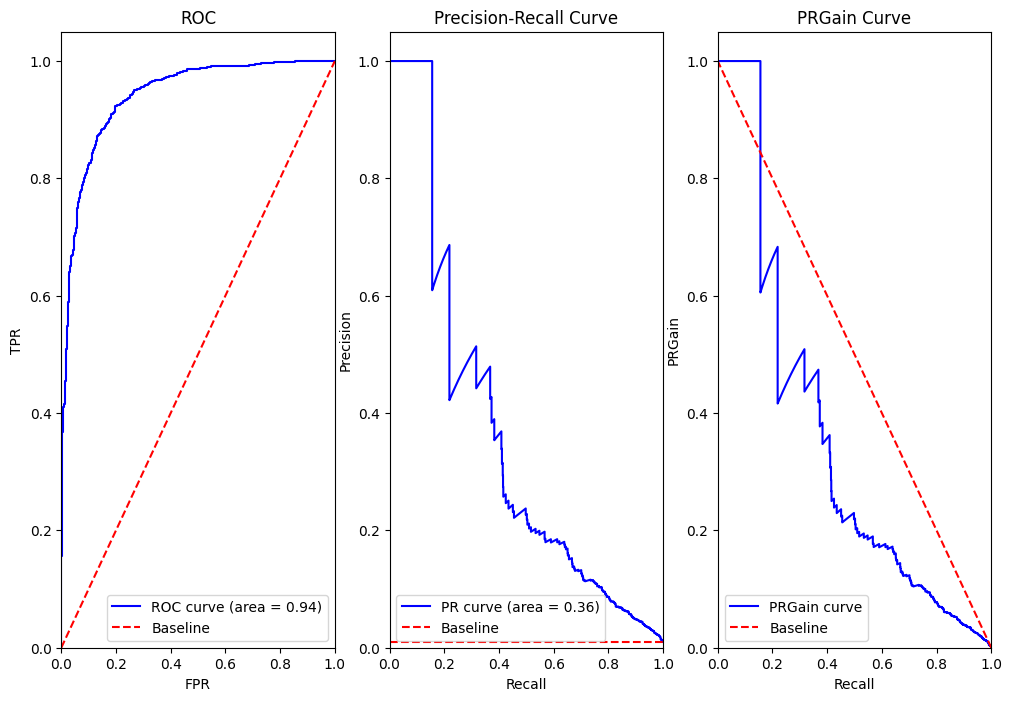

Plotting curves ROC + PR curves for df1000 using LDA and target class 1


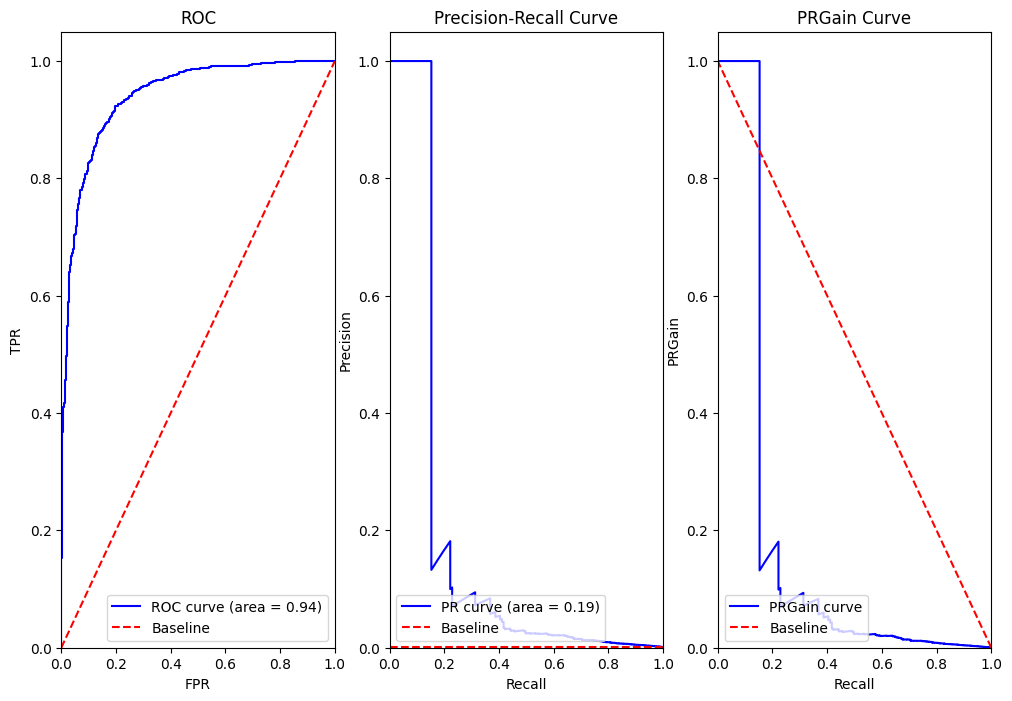

Plotting curves for df1000 using SVM and target class 1


c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


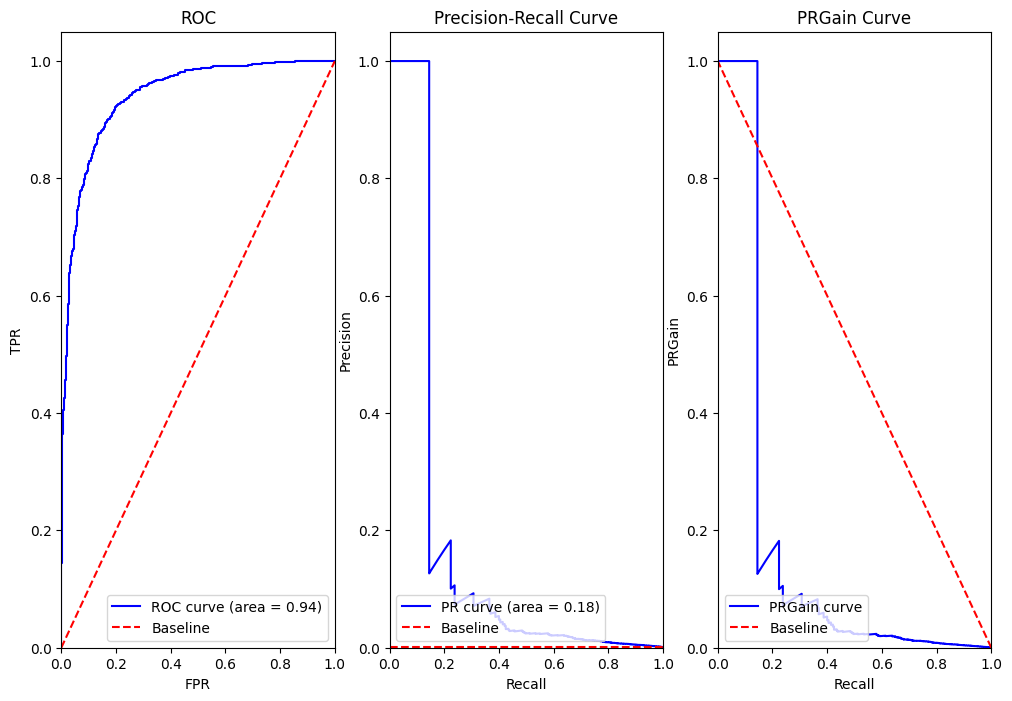

Plotting curves ROC + PR curves for df10000 using LDA and target class 1


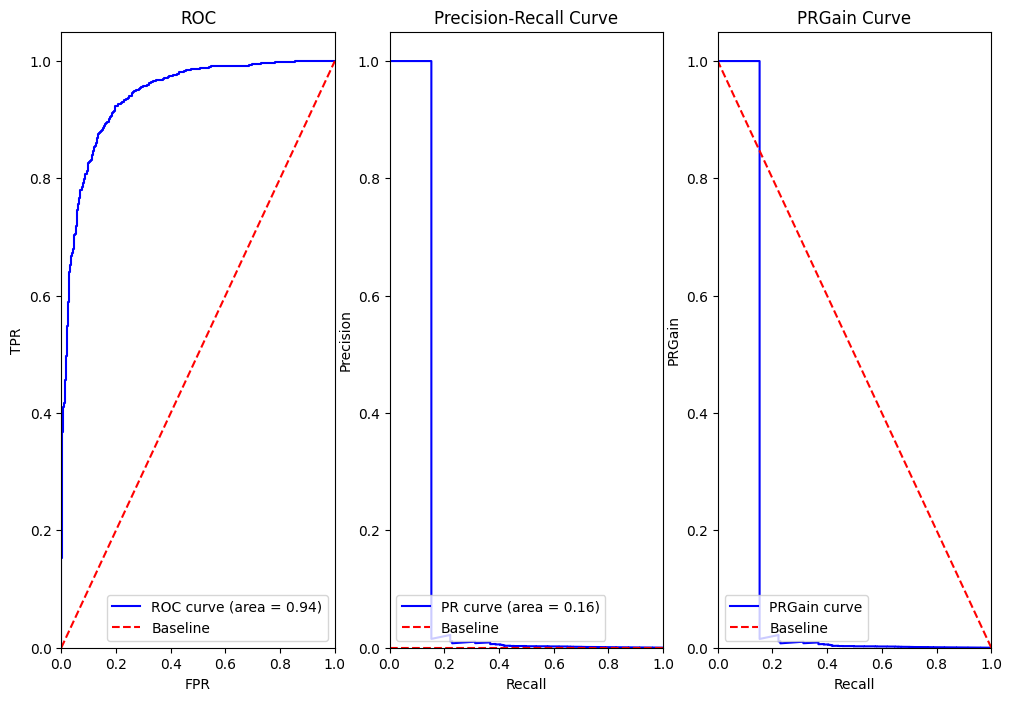

Plotting curves for df10000 using SVM and target class 1


c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


KeyboardInterrupt: 

In [44]:
# Вывод для другого целевого класса

for key, dataset in datasets.items():
    print(f'Plotting curves ROC + PR curves for {key} using LDA and target class 2')
    lda_model = LinearDiscriminantAnalysis()
    plot_curves(dataset, lda_model, 'LDA', target_class=2)

    print(f'Plotting curves for {key} using SVM and target class 2')
    svc_model = LinearSVC()
    plot_curves(dataset, svc_model, 'SVM', target_class=2)

In [ ]:
from sklearn.model_selection import StratifiedKFold
from scipy.stats import norm

# Функция для расчета доверительного интервала
def compute_confidence_interval(scores, confidence=0.95):
    mean = np.mean(scores)
    std_err = np.std(scores) / np.sqrt(len(scores))
    margin = std_err * norm.ppf((1 + confidence) / 2)
    return mean, mean - margin, mean + margin

from sklearn.metrics import roc_auc_score, average_precision_score

def cross_val_auroc_auprc(X, y, model, n_splits_list, confidence=0.95):
    results = {}
    
    for n_splits in n_splits_list:
        print(f"\nEvaluating {n_splits}-fold cross-validation")
        skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
        
        auroc_scores = []
        auprc_scores = []
        
        for train_index, test_index in skf.split(X, y):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            
            # Обучаем модель
            model.fit(X_train, y_train)
            y_scores = model.decision_function(X_test)
            
            # Считаем AUROC и AUPRC
            auroc = roc_auc_score(y_test, y_scores)
            auprc = average_precision_score(y_test, y_scores)
            
            auroc_scores.append(auroc)
            auprc_scores.append(auprc)
        
        # Считаем доверительные интервалы
        auroc_mean, auroc_ci_low, auroc_ci_high = compute_confidence_interval(auroc_scores, confidence=confidence)
        auprc_mean, auprc_ci_low, auprc_ci_high = compute_confidence_interval(auprc_scores, confidence=confidence)
        
        # Сохраняем результаты
        results[n_splits] = {
            'AUROC': (auroc_mean, auroc_ci_low, auroc_ci_high),
            'AUPRC': (auprc_mean, auprc_ci_low, auprc_ci_high)
        }
    
    return results

def plot_results(results, metric_name):
    n_splits_list = list(results.keys())
    means = [results[n]['AUROC'][0] if metric_name == 'AUROC' else results[n]['AUPRC'][0] for n in n_splits_list]
    ci_lows = [results[n]['AUROC'][1] if metric_name == 'AUROC' else results[n]['AUPRC'][1] for n in n_splits_list]
    ci_highs = [results[n]['AUROC'][2] if metric_name == 'AUROC' else results[n]['AUPRC'][2] for n in n_splits_list]
    
    # Построение графика
    plt.figure(figsize=(10, 5))
    plt.plot(n_splits_list, means, label=f'{metric_name} mean', marker='o')
    plt.fill_between(n_splits_list, ci_lows, ci_highs, color='b', alpha=0.2, label=f'{metric_name} CI')
    
    plt.xlabel('Number of folds')
    plt.ylabel(metric_name)
    plt.title(f'{metric_name} with Confidence Intervals for Different Number of Folds')
    plt.legend()
    plt.grid()
    plt.show()

# Пример данных
ds = datasets['df10000']
df_filtered = ds[ds['target'].isin([1,2])]
X = df_filtered[['feature_3', 'feature_4']]
y = df_filtered['target']
#X = datasets['df10000'][['feature_3', 'feature_4']].values  # Фичи
#y = (datasets['df10000']['target'] == 1).astype(int).values  # Бинарные метки

# Модель, например, SVM
model = LinearDiscriminantAnalysis()

# Список количества фолдов
n_splits_list = [3, 5, 10, 20, 50, 100]

# Расчет AUROC и AUPRC с доверительными интервалами
results = cross_val_auroc_auprc(X, y, model, n_splits_list, confidence=0.95)

# Визуализация AUROC
plot_results(results, metric_name='AUROC')

# Визуализация AUPRC
plot_results(results, metric_name='AUPRC')



Evaluating 3-fold cross-validation
